1. Ознакомьтесь с датасетом образцов эмоциональной речи

    **Toronto emotional speech set (TESS)**:

    https://dataverse.scholarsportal.info/dataset.xhtml?persistentId=doi:10.5683/SP2/E8H2MF

    Ссылка для загрузки данных: https://storage.yandexcloud.net/aiueducation/Content/base/l12/dataverse_files.zip

2. Разберите датасет;
3. Подготовьте и разделите данные на обучающие и тестовые;
4. Разработайте классификатор, показывающий на тесте точность распознавания эмоции не менее 98%;
5. Ознакомьтесь с другим датасетом похожего содержания

    **Surrey Audio-Visual Expressed Emotion (SAVEE)**:

    https://www.kaggle.com/ejlok1/surrey-audiovisual-expressed-emotion-savee

    Ссылка для загрузки данных: https://storage.yandexcloud.net/aiueducation/Content/base/l12/archive.zip

6. Прогоните обученный классификатор на файлах из датасета **SAVEE** по вашему выбору;
7. Сделайте выводы.

In [ ]:
# Массивы
import numpy as np

# Отрисовка графиков
import matplotlib.pyplot as plt

# Загрузка из google облака
import gdown

# Преобразование категориальных данных в one hot encoding
from tensorflow.keras.utils import to_categorical

# Работа с папками и файлами
import os

# Регулярные выражения
import re

# Расширение имен файлов по маске
import glob

# Копирование файлов
import shutil

# Утилиты работы со временем
import time

# Работа со случайными числами
import random

# Математические функции
import math

# Сохранение и загрузка структур данных Python
import pickle

# Параметризация аудио
import librosa

# Оптимизаторы для обучения моделей
from tensorflow.keras.optimizers import Adam, RMSprop

# Конструирование и загрузка моделей нейронных сетей
from tensorflow.keras.models import Sequential, Model, load_model

# Основные слои
from tensorflow.keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten, Conv1D, Conv2D, LSTM

# Разбиение на обучающую и проверочную выборку
from sklearn.model_selection import train_test_split

# Кодирование категориальных меток, нормирование числовых данных
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Матрица ошибок классификатора
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Отключение предупреждений
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 

In [ ]:
# Загрузка датасета
gdown.download('https://storage.yandexcloud.net/aiueducation/Content/base/l12/dataverse_files.zip', None, quiet=True)

'dataverse_files.zip'

In [ ]:
# Настройки папок

RAW_DIR  = './dataverse'                  # Папка с сырыми данными
FILE_DIR = './data'                       # Папка с разобранными файлами датасета

In [ ]:
# Очистка папки сырых данных от прошлых запусков
!rm -rf {RAW_DIR}

# Распаковка архива на локальный диск colab
!unzip -qo dataverse_files.zip -d {RAW_DIR}

# Проверка выгруженных файлов
!ls {RAW_DIR}

MANIFEST.TXT		OAF_reach_fear.wav	 YAF_jail_ps.wav
OAF_back_angry.wav	OAF_reach_happy.wav	 YAF_jail_sad.wav
OAF_back_disgust.wav	OAF_reach_neutral.wav	 YAF_jar_angry.wav
OAF_back_fear.wav	OAF_reach_ps.wav	 YAF_jar_disgust.wav
OAF_back_happy.wav	OAF_reach_sad.wav	 YAF_jar_fear.wav
OAF_back_neutral.wav	OAF_read_angry.wav	 YAF_jar_happy.wav
OAF_back_ps.wav		OAF_read_disgust.wav	 YAF_jar_neutral.wav
OAF_back_sad.wav	OAF_read_fear.wav	 YAF_jar_ps.wav
OAF_bar_angry.wav	OAF_read_happy.wav	 YAF_jar_sad.wav
OAF_bar_disgust.wav	OAF_read_neutral.wav	 YAF_join_angry.wav
OAF_bar_fear.wav	OAF_read_ps.wav		 YAF_join_disgust.wav
OAF_bar_happy.wav	OAF_read_sad.wav	 YAF_join_fear.wav
OAF_bar_neutral.wav	OAF_red_angry.wav	 YAF_join_happy.wav
OAF_bar_ps.wav		OAF_red_disgust.wav	 YAF_join_neutral.wav
OAF_bar_sad.wav		OAF_red_fear.wav	 YAF_join_ps.wav
OAF_base_angry.wav	OAF_red_happy.wav	 YAF_join_sad.wav
OAF_base_disgust.wav	OAF_red_neutral.wav	 YAF_judge_angry.wav
OAF_base_fear.wav	OAF_red_ps.wav		 YAF_jud

In [ ]:
# Разбор датасета. Сбор имен авторов, названий эмоций, меток фраз

author = []
word = []
emotion = []

# Формирование списков меток
for file_name in glob.glob(f'{RAW_DIR}/*.wav'):
    file_author, file_word, file_emotion = file_name.split('/')[2].split('.')[0].split('_')
    author.append(file_author)
    word.append(file_word)
    emotion.append(file_emotion)

# Удаление дубликатов из всех списков
author = sorted(list(set(author)))
word = sorted(list(set(word)))
emotion = sorted(list(set(emotion)))

# Проверка результата
print(f'Авторы: {len(author)} - {author}')
print(f'Слова:  {len(word)} - {word}')
print(f'Эмоции: {len(emotion)} - {emotion}')

Авторы: 2 - ['OAF', 'YAF']
Слова:  200 - ['back', 'bar', 'base', 'bath', 'bean', 'beg', 'bite', 'boat', 'bone', 'book', 'bought', 'burn', 'cab', 'calm', 'came', 'cause', 'chain', 'chair', 'chalk', 'chat', 'check', 'cheek', 'chief', 'choice', 'cool', 'dab', 'date', 'dead', 'death', 'deep', 'dime', 'dip', 'ditch', 'dodge', 'dog', 'doll', 'door', 'fail', 'fall', 'far', 'fat', 'fit', 'five', 'food', 'gap', 'gas', 'gaze', 'germ', 'get', 'gin', 'goal', 'good', 'goose', 'gun', 'half', 'hall', 'hash', 'hate', 'have', 'haze', 'hire', 'hit', 'hole', 'home', 'hurl', 'hush', 'jail', 'jar', 'join', 'judge', 'jug', 'juice', 'keen', 'keep', 'keg', 'kick', 'kill', 'king', 'kite', 'knock', 'late', 'laud', 'lean', 'learn', 'lease', 'lid', 'life', 'limb', 'live', 'loaf', 'long', 'lore', 'lose', 'lot', 'love', 'luck', 'make', 'match', 'merge', 'mess', 'met', 'mill', 'mob', 'mode', 'mood', 'moon', 'mop', 'mouse', 'nag', 'name', 'near', 'neat', 'nice', 'note', 'numb', 'pad', 'page', 'pain', 'pass', 'pearl',

In [ ]:
# Разбор датасета. Копирование и индексирование файлов в папку FILE_DIR

try:
    os.mkdir(FILE_DIR)
    for emo_name in emotion:
        os.mkdir(f'{FILE_DIR}/{emo_name}')
except FileExistsError:
    pass


for file_emo in emotion:
    file_index = 0
    for file_word in word:
        for file_author in author:
            src = f'{RAW_DIR}/{file_author}_{file_word}_{file_emo}.wav'
            dst = '{}/{}/{}.{:05d}.wav'.format(FILE_DIR, file_emo, file_emo, file_index)
            print(f'Копирование: {src} -> {dst}')
            shutil.copy(src, dst)
            file_index += 1

Копирование: ./dataverse/OAF_back_angry.wav -> ./data/angry/angry.00000.wav
Копирование: ./dataverse/YAF_back_angry.wav -> ./data/angry/angry.00001.wav
Копирование: ./dataverse/OAF_bar_angry.wav -> ./data/angry/angry.00002.wav
Копирование: ./dataverse/YAF_bar_angry.wav -> ./data/angry/angry.00003.wav
Копирование: ./dataverse/OAF_base_angry.wav -> ./data/angry/angry.00004.wav
Копирование: ./dataverse/YAF_base_angry.wav -> ./data/angry/angry.00005.wav
Копирование: ./dataverse/OAF_bath_angry.wav -> ./data/angry/angry.00006.wav
Копирование: ./dataverse/YAF_bath_angry.wav -> ./data/angry/angry.00007.wav
Копирование: ./dataverse/OAF_bean_angry.wav -> ./data/angry/angry.00008.wav
Копирование: ./dataverse/YAF_bean_angry.wav -> ./data/angry/angry.00009.wav
Копирование: ./dataverse/OAF_beg_angry.wav -> ./data/angry/angry.00010.wav
Копирование: ./dataverse/YAF_beg_angry.wav -> ./data/angry/angry.00011.wav
Копирование: ./dataverse/OAF_bite_angry.wav -> ./data/angry/angry.00012.wav
Копирование: ./d

In [ ]:
#Файлов в каждом классе 400, из них 380 оставляем на обучение, последние 20 каждого класса - на тестовый набор:

In [ ]:
# Установка констант

CLASS_LIST = os.listdir(FILE_DIR)         # Список классов, порядок меток не определен!
CLASS_LIST.sort()                         # Сортировка списка классов для фиксации порядка меток
CLASS_COUNT = len(CLASS_LIST)             # Количество классов
CLASS_FILES = 400                         # Общее количество файлов в каждом классе
FILE_INDEX_TRAIN_SPLIT = 380              # Количество файлов каждого класса на основной набор
N_FFT = 8192                              # Размер окна преобразования Фурье для расчета спектра
HOP_LENGTH = 512                          # Объем данных для расчета одного набора признаков

In [ ]:
# Проверка списка классов
print(CLASS_LIST)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad']


In [ ]:
# Функция параметризации аудио

def get_features(y, sr, n_fft=N_FFT, hop_length=HOP_LENGTH):
    
    # Вычисление различных параметров (признаков) аудио
    
    # Мел-кепстральные коэффициенты
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)
    
    # Среднеквадратическая амплитуда
    rmse = librosa.feature.rms(y=y, hop_length=hop_length)
    
    # Спектральный центроид
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)
    
    # Ширина полосы частот
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)
    
    # Спектральный спад частоты
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)
    
    # Пересечения нуля
    zcr = librosa.feature.zero_crossing_rate(y, hop_length=hop_length)
    
    # Сборка параметров в общий список:
    # На один файл один усредненный вектор признаков
    features = {'rmse': rmse.mean(axis=1, keepdims=True),
                'spct': spec_cent.mean(axis=1, keepdims=True),
                'spbw': spec_bw.mean(axis=1, keepdims=True),
                'roff': rolloff.mean(axis=1, keepdims=True),
                'zcr' : zcr.mean(axis=1, keepdims=True),
                'mfcc': mfcc.mean(axis=1, keepdims=True)}

    return features

In [ ]:
# Функция объединения признаков в набор векторов

def stack_features(feat):
    features = None
    for v in feat.values():
        features = np.vstack((features, v)) if features is not None else v

    return features.T

In [ ]:
# Функция формирования набора признаков и метки класса для аудиофайла

def get_feature_list_from_file(class_index, song_name):
    
    # Загрузка в y первых duration_sec секунд аудиосигнала
    y, sr = librosa.load(song_name, mono=True)
    
    # Извлечение параметров из аудиосигнала
    features = get_features(y, sr)
    feature_set = stack_features(features)
    
    # Перевод номера класса в one hot encoding
    y_label = to_categorical(class_index, CLASS_COUNT)

    return feature_set, y_label

In [ ]:
# Функция формирования подвыборки признаков и меток класса для одного файла

def process_file(class_index, file_index):
    x_list = []
    y_list = []
    class_name = CLASS_LIST[class_index]
    
    # Извлечение имени произведения
    song_name = f'{FILE_DIR}/{class_name}/{class_name}.{str(file_index).zfill(5)}.wav'

    # Выборка признаков и метки класса для произведения
    feature_set, y_label = get_feature_list_from_file(class_index, 
                                                        song_name)

    # Добавление данных в наборы
    for j in range(feature_set.shape[0]):
        x_list.append(feature_set[j])
        y_list.append(y_label)

    # Возврат имени файла и numpy-массивов призанков и меток класса
    return song_name, \
           np.array(x_list).astype('float32'), \
           np.array(y_list).astype('float32')

In [ ]:
# Функция формирования набора данных из файлов всех классов по диапазону номеров файлов

def extract_data(file_index_start, file_index_end):

    # Списки для последовательностей входных данных и меток класса
    x_data = None
    y_data = None

    # Фиксация времени старта формирования выборки
    curr_time = time.time()

    # Для всех классов:
    for class_index in range(len(CLASS_LIST)):
        # Для всех файлов текущего класса из заданного диапазона номеров:
        for file_index in range(file_index_start, file_index_end):
            # Обработка одного файла и добавление данных к общим массивам
            _, file_x_data, file_y_data = process_file(class_index, file_index)
            x_data = file_x_data if x_data is None else np.vstack([x_data, file_x_data])
            y_data = file_y_data if y_data is None else np.vstack([y_data, file_y_data])

        # Вывод информации о готовности обработки датасета
        print(f'Класс {CLASS_LIST[class_index]} готов -> {round(time.time() - curr_time)} c')
        curr_time = time.time()

    # Возврат массивов набора данных
    return x_data, y_data

In [ ]:
# Формирование тренировочного (основного) набора данных
x_train_data, y_train_data = extract_data(0, FILE_INDEX_TRAIN_SPLIT)

Класс angry готов -> 59 c
Класс disgust готов -> 68 c
Класс fear готов -> 56 c
Класс happy готов -> 60 c
Класс neutral готов -> 62 c
Класс ps готов -> 61 c
Класс sad готов -> 68 c


In [ ]:
# Вывод номеров классов для проверки правильности заполнения
# Номера классов идут последовательно крупными блоками
print(np.argmax(y_train_data, axis=1))

[0 0 0 ... 6 6 6]


In [ ]:
# Вывод формы данных обучающего набора

print(x_train_data.shape, x_train_data.dtype)
print(y_train_data.shape, y_train_data.dtype)

(2660, 25) float32
(2660, 7) float32


In [ ]:
# Нормирование признаков в соответствии со стандартным нормальным распределением

x_scaler = StandardScaler()
x_train_data_scaled = x_scaler.fit_transform(x_train_data)

In [ ]:
# Проверка нормирования
print(x_train_data_scaled[0])

[ 0.6035443  -1.0051122  -1.2160332  -0.941549   -1.1316185   0.5719085
  0.2730159  -1.846796   -1.7829927  -0.33854598  1.1657425  -2.2728305
  0.12124048 -0.03184166 -0.51615316  2.7857838  -0.20487094  1.7255286
 -0.18705814  1.767676    0.763946   -1.0001484  -1.3779873  -0.34414503
 -1.8803229 ]


In [ ]:
# Проверка формы набора данных
print(x_train_data.shape, y_train_data.shape)

(2660, 25) (2660, 7)


In [ ]:
# Формирование тестовой выборки из файлов, не вошедших в основной набор

x_test, y_test = extract_data(FILE_INDEX_TRAIN_SPLIT, CLASS_FILES)
x_test = x_scaler.transform(x_test)

Класс angry готов -> 3 c
Класс disgust готов -> 4 c
Класс fear готов -> 3 c
Класс happy готов -> 4 c
Класс neutral готов -> 3 c
Класс ps готов -> 3 c
Класс sad готов -> 4 c


In [ ]:
# В качестве обучающей выборки используется весь обучающий набор данных

x_train = x_train_data_scaled
y_train = y_train_data

In [ ]:
# Проверка формы и типа данных обучающей и тестовой выборок

print(x_train.shape, x_train.dtype)
print(y_train.shape, y_train.dtype)
print()
print(x_test.shape, x_test.dtype)
print(y_test.shape, y_test.dtype)

(2660, 25) float32
(2660, 7) float32

(140, 25) float32
(140, 7) float32


In [ ]:
# Вывод графиков точности и ошибки распознавания на обучающей и проверочной выборках

def show_history(history  # объект-результат метода обучения .fit()
                 ):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
    fig.suptitle('График процесса обучения модели')
    ax1.plot(history.history['accuracy'], 
               label='Доля верных ответов на обучающем наборе')
    ax1.plot(history.history['val_accuracy'], 
               label='Доля верных ответов на проверочном наборе')
    ax1.xaxis.get_major_locator().set_params(integer=True)
    ax1.set_xlabel('Эпоха обучения')
    ax1.set_ylabel('Доля верных ответов')
    ax1.legend()

    ax2.plot(history.history['loss'], 
               label='Ошибка на обучающем наборе')
    ax2.plot(history.history['val_loss'], 
               label='Ошибка на проверочном наборе')
    ax2.xaxis.get_major_locator().set_params(integer=True)
    ax2.set_xlabel('Эпоха обучения')
    ax2.set_ylabel('Ошибка')
    ax2.legend()
    plt.show()

In [ ]:
# Функция оценки точности модели на заданной выборке

def eval_model(model,  # обученная модель классификатора
               x,      # входные данные для предсказаний модели
               y_true  # выходные данные (верные ответы)
               ):
    
    loss, acc = model.evaluate(x, y_true)
    print(f'Ошибка: {loss}, точность: {acc}')

    # Построение матрицы ошибок
    y_pred = model.predict(x)
    cm = confusion_matrix(np.argmax(y_true, axis=1),
                          np.argmax(y_pred, axis=1),
                          normalize='true')

    # Отрисовка матрицы ошибок
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_title('Матрица ошибок нормализованная')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CLASS_LIST)
    disp.plot(ax=ax)
    plt.show() 

In [ ]:
# Классификация файла и визуализация предсказания модели для него

def classify_file(model,        # обученная модель классификатора
                  x_scaler,     # настроенный нормировщих входных данных
                  class_index,  # верный индекс класса аудиофайла
                  file_index    # индекс (порядковый номер) аудиофайла в папке
                  ):
    
    # Подготовка выборки данных файла произведения
    song_name, file_x_data, file_y_data = process_file(class_index, file_index)

    # Нормирование признаков уже настроенным нормировщиком
    file_x_data = x_scaler.transform(file_x_data)

    print('Файл:', song_name)
    print('Векторы для предсказания:', file_x_data.shape)

    # Вычисление предсказания по выборке
    predict = model.predict(file_x_data)
    
    # Определение среднего предсказания (голосование)
    predict_mean = predict.mean(axis=0)
    
    # Определение индекса класса по результату голосования
    predict_class_index = np.argmax(predict_mean)
    
    # Вычисление признака правильного предсказания
    predict_good = predict_class_index == class_index

    # Визуализация предсказания сети для файла
    plt.figure(figsize=(10,3))
    print('Классификация сети:', CLASS_LIST[predict_class_index], '-', 'ВЕРНО :-)' if predict_good else 'НЕВЕРНО.')
    plt.title('Среднее распределение векторов предсказаний')
    plt.bar(CLASS_LIST, predict_mean, color='g' if predict_good else 'r')
    plt.show()
    print('---------------------------------------------------------------')

    # Возврат результата предсказания
    return predict_class_index

In [ ]:
# Классификация и визуализация нескольких файлов каждого класса 

def classify_test_files(model,       # обученная модель классификатора
                        x_scaler,    # настроенный нормировщих входных данных
                        from_index,  # индекс аудиофайла, с которого начинать визуализацию
                        n_files):    # количество файлов для визуализации
    predict_all = 0
    predict_good = 0
    y_true = []
    y_pred = []

    # Классификация каждого файла и аккумуляция результатов классификации
    for class_index in range(CLASS_COUNT):
        for file_index in range(from_index, from_index + n_files):
            predict_class_index = classify_file(model, x_scaler, class_index, file_index)
            y_true.append(class_index)
            y_pred.append(predict_class_index)
            predict_all += 1
            predict_good += (predict_class_index == class_index)

    # Расчет и вывод итогов классификации
    good_ratio = round(predict_good / predict_all * 100., 2)
    print(f'=== Обработано образцов: {predict_all}, из них распознано верно: {predict_good}, доля верных: {good_ratio}% ===')   

    # Построение матрицы ошибок без нормализации, покажет попадания в штуках
    cm = confusion_matrix(y_true, y_pred)

    # Отрисовка матрицы ошибок
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_title('Матрица ошибок по файлам аудио (не нормализованная)')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CLASS_LIST)
    disp.plot(ax=ax)
    plt.show()

In [ ]:
# Функция сборки классификатора на полносвязных слоях

def create_model():
    model = Sequential()
    model.add(Dense(256, activation='relu', input_shape=x_train.shape[1:]))
    model.add(Dropout(0.2))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(CLASS_COUNT, activation='softmax'))

    return model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               6656      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 7)                 4

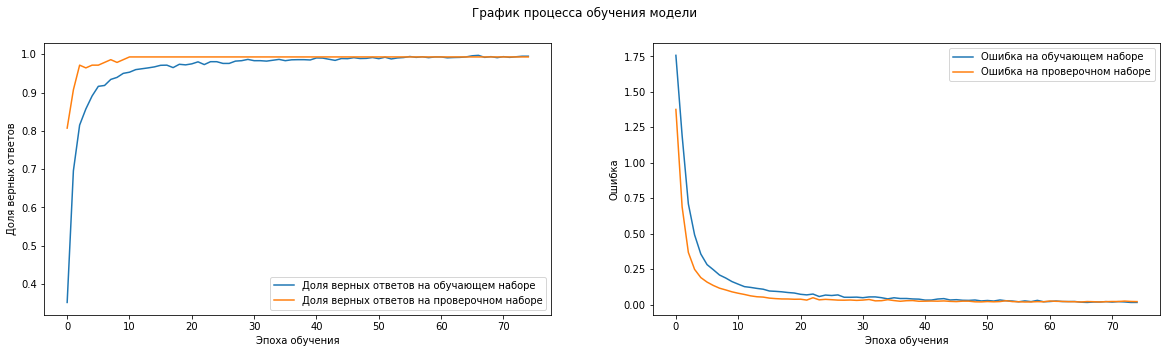

In [ ]:
# Задание параметров обучения
EPOCHS      = 75
BATCH_SIZE  = 16

# Создание модели
model = create_model()
model.summary()

# Компиляция
model.compile(optimizer=Adam(learning_rate=1e-4),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

# Обучение
history = model.fit(x_train,
                    y_train,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_data=(x_test, y_test),
                    verbose=1)

# Отрисовка графиков ошибки и точности
show_history(history)

5/5 [==============================] - 0s 3ms/step - loss: 0.0213 - accuracy: 0.9929
Ошибка: 0.021258428692817688, точность: 0.9928571581840515
5/5 [==============================] - 0s 2ms/step


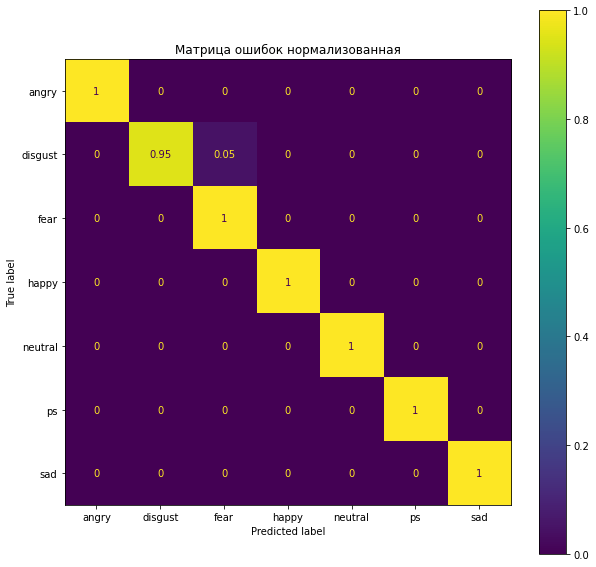

In [ ]:
# Оценка точности сети на тестовой выборке
eval_model(model, x_test, y_test)

Файл: ./data/angry/angry.00390.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 23ms/step
Классификация сети: angry - ВЕРНО :-)


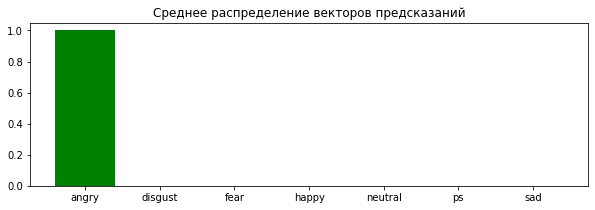

---------------------------------------------------------------
Файл: ./data/angry/angry.00391.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 17ms/step
Классификация сети: angry - ВЕРНО :-)


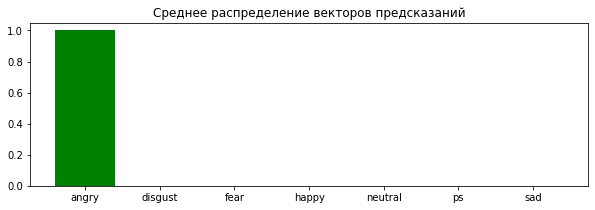

---------------------------------------------------------------
Файл: ./data/angry/angry.00392.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 18ms/step
Классификация сети: angry - ВЕРНО :-)


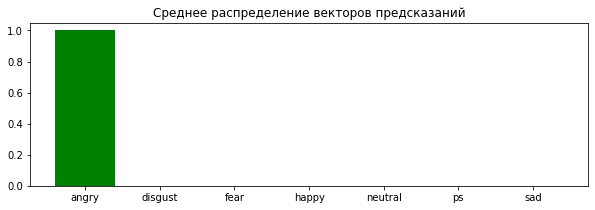

---------------------------------------------------------------
Файл: ./data/angry/angry.00393.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 20ms/step
Классификация сети: angry - ВЕРНО :-)


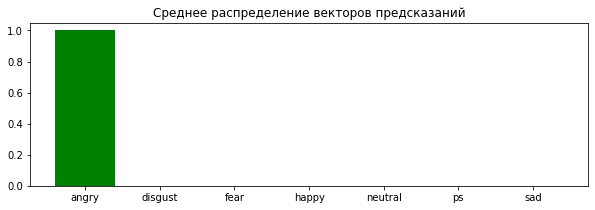

---------------------------------------------------------------
Файл: ./data/angry/angry.00394.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 20ms/step
Классификация сети: angry - ВЕРНО :-)


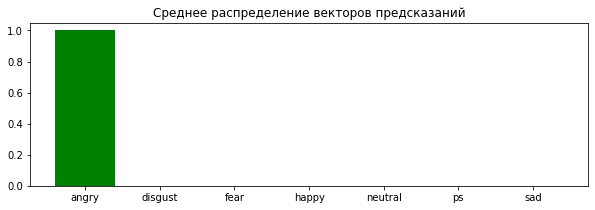

---------------------------------------------------------------
Файл: ./data/angry/angry.00395.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 18ms/step
Классификация сети: angry - ВЕРНО :-)


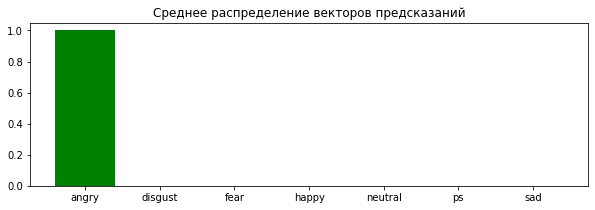

---------------------------------------------------------------
Файл: ./data/angry/angry.00396.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 28ms/step
Классификация сети: angry - ВЕРНО :-)


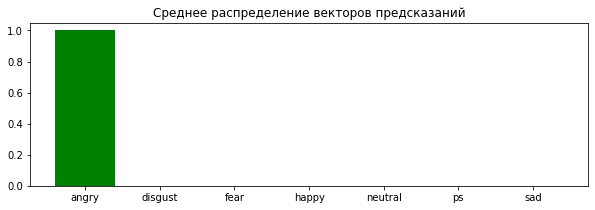

---------------------------------------------------------------
Файл: ./data/angry/angry.00397.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 17ms/step
Классификация сети: angry - ВЕРНО :-)


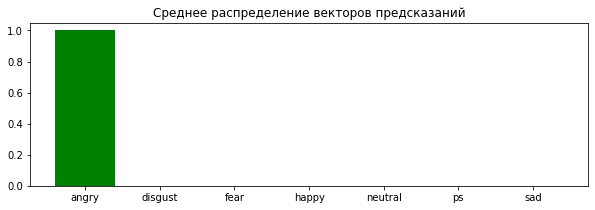

---------------------------------------------------------------
Файл: ./data/angry/angry.00398.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 22ms/step
Классификация сети: angry - ВЕРНО :-)


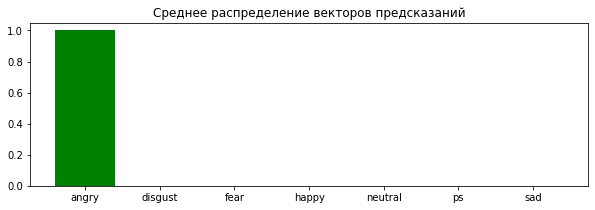

---------------------------------------------------------------
Файл: ./data/angry/angry.00399.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 17ms/step
Классификация сети: angry - ВЕРНО :-)


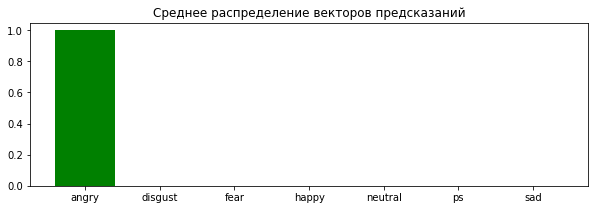

---------------------------------------------------------------
Файл: ./data/disgust/disgust.00390.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 17ms/step
Классификация сети: disgust - ВЕРНО :-)


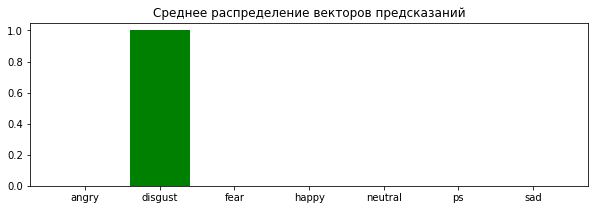

---------------------------------------------------------------
Файл: ./data/disgust/disgust.00391.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 18ms/step
Классификация сети: disgust - ВЕРНО :-)


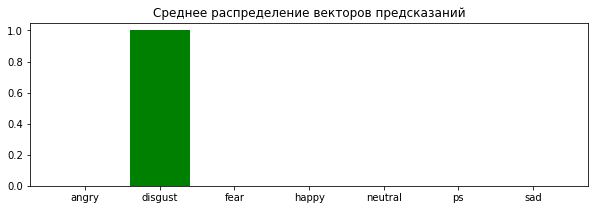

---------------------------------------------------------------
Файл: ./data/disgust/disgust.00392.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 20ms/step
Классификация сети: disgust - ВЕРНО :-)


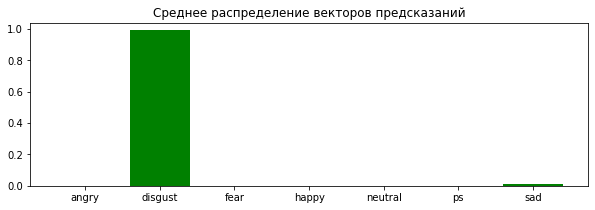

---------------------------------------------------------------
Файл: ./data/disgust/disgust.00393.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 19ms/step
Классификация сети: disgust - ВЕРНО :-)


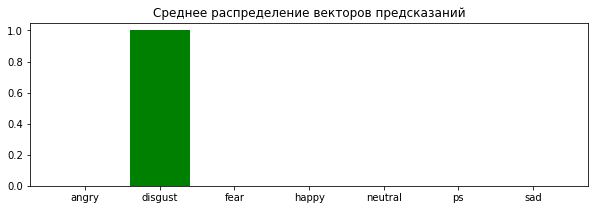

---------------------------------------------------------------
Файл: ./data/disgust/disgust.00394.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 17ms/step
Классификация сети: disgust - ВЕРНО :-)


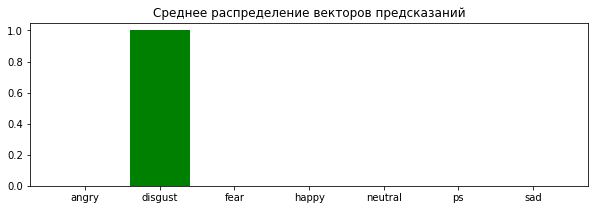

---------------------------------------------------------------
Файл: ./data/disgust/disgust.00395.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 16ms/step
Классификация сети: disgust - ВЕРНО :-)


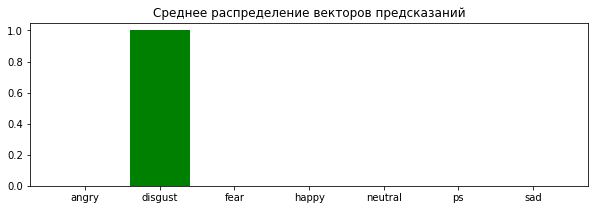

---------------------------------------------------------------
Файл: ./data/disgust/disgust.00396.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 20ms/step
Классификация сети: disgust - ВЕРНО :-)


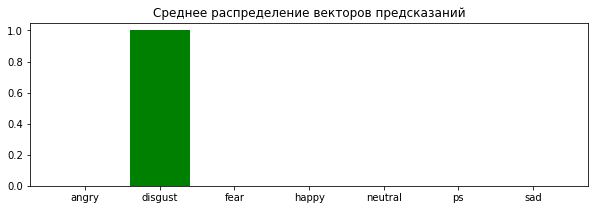

---------------------------------------------------------------
Файл: ./data/disgust/disgust.00397.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 20ms/step
Классификация сети: disgust - ВЕРНО :-)


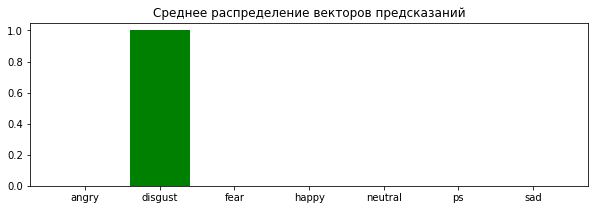

---------------------------------------------------------------
Файл: ./data/disgust/disgust.00398.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 19ms/step
Классификация сети: fear - НЕВЕРНО.


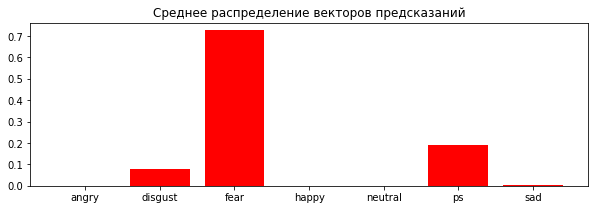

---------------------------------------------------------------
Файл: ./data/disgust/disgust.00399.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 15ms/step
Классификация сети: disgust - ВЕРНО :-)


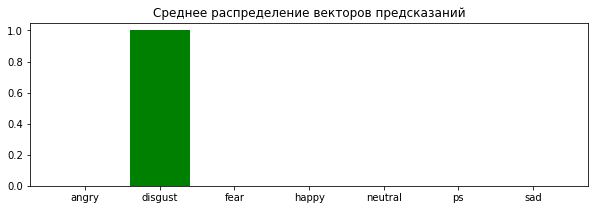

---------------------------------------------------------------
Файл: ./data/fear/fear.00390.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 20ms/step
Классификация сети: fear - ВЕРНО :-)


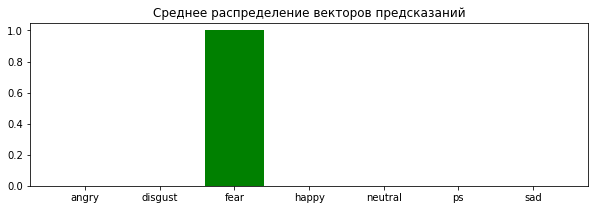

---------------------------------------------------------------
Файл: ./data/fear/fear.00391.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 23ms/step
Классификация сети: fear - ВЕРНО :-)


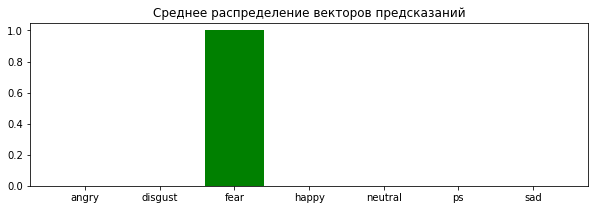

---------------------------------------------------------------
Файл: ./data/fear/fear.00392.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 21ms/step
Классификация сети: fear - ВЕРНО :-)


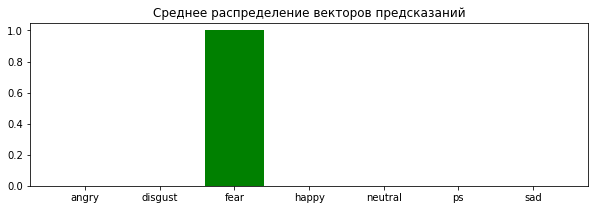

---------------------------------------------------------------
Файл: ./data/fear/fear.00393.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 15ms/step
Классификация сети: fear - ВЕРНО :-)


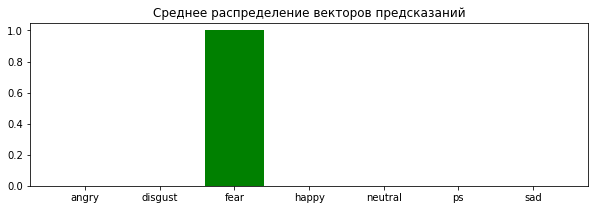

---------------------------------------------------------------
Файл: ./data/fear/fear.00394.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 22ms/step
Классификация сети: fear - ВЕРНО :-)


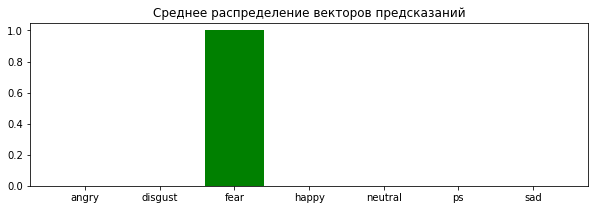

---------------------------------------------------------------
Файл: ./data/fear/fear.00395.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 25ms/step
Классификация сети: fear - ВЕРНО :-)


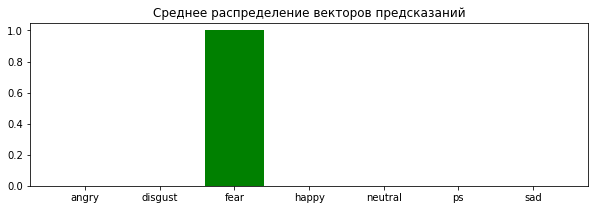

---------------------------------------------------------------
Файл: ./data/fear/fear.00396.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 26ms/step
Классификация сети: fear - ВЕРНО :-)


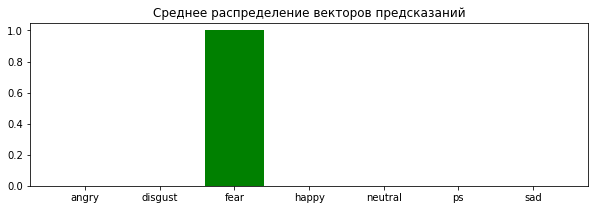

---------------------------------------------------------------
Файл: ./data/fear/fear.00397.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 21ms/step
Классификация сети: fear - ВЕРНО :-)


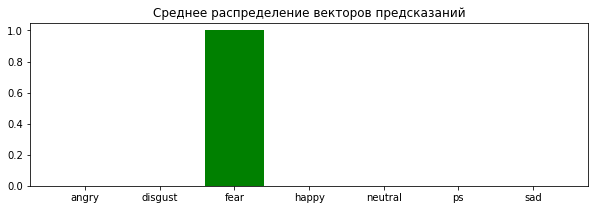

---------------------------------------------------------------
Файл: ./data/fear/fear.00398.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 21ms/step
Классификация сети: fear - ВЕРНО :-)


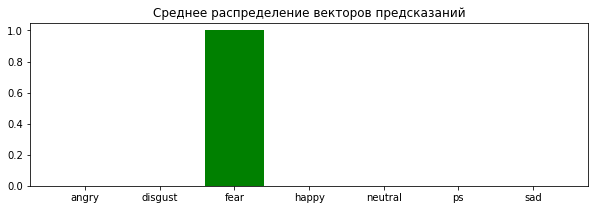

---------------------------------------------------------------
Файл: ./data/fear/fear.00399.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 21ms/step
Классификация сети: fear - ВЕРНО :-)


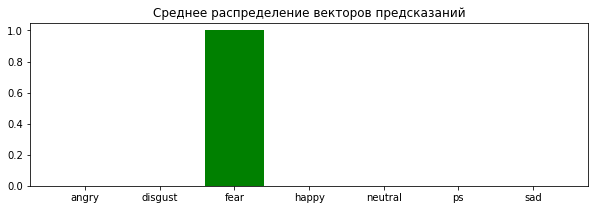

---------------------------------------------------------------
Файл: ./data/happy/happy.00390.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 24ms/step
Классификация сети: happy - ВЕРНО :-)


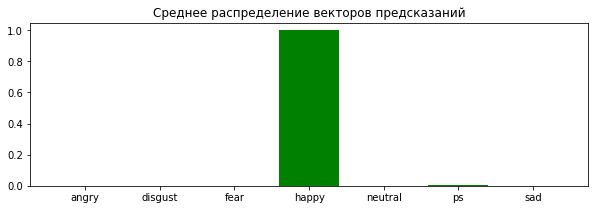

---------------------------------------------------------------
Файл: ./data/happy/happy.00391.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 20ms/step
Классификация сети: happy - ВЕРНО :-)


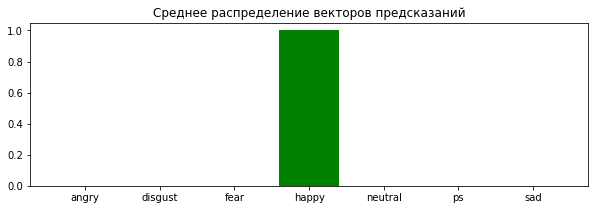

---------------------------------------------------------------
Файл: ./data/happy/happy.00392.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 31ms/step
Классификация сети: happy - ВЕРНО :-)


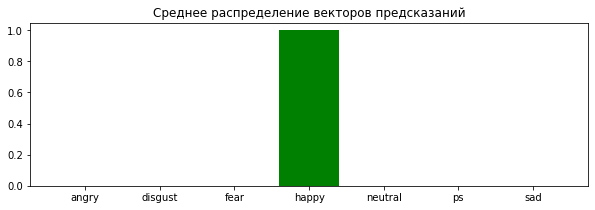

---------------------------------------------------------------
Файл: ./data/happy/happy.00393.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 24ms/step
Классификация сети: happy - ВЕРНО :-)


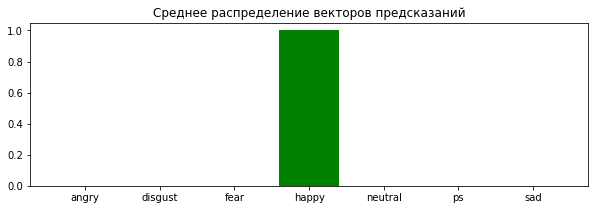

---------------------------------------------------------------
Файл: ./data/happy/happy.00394.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 19ms/step
Классификация сети: happy - ВЕРНО :-)


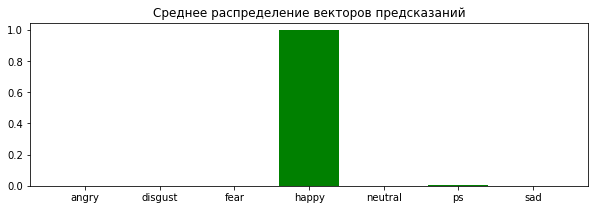

---------------------------------------------------------------
Файл: ./data/happy/happy.00395.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 21ms/step
Классификация сети: happy - ВЕРНО :-)


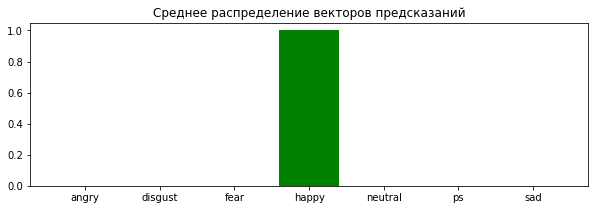

---------------------------------------------------------------
Файл: ./data/happy/happy.00396.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 18ms/step
Классификация сети: happy - ВЕРНО :-)


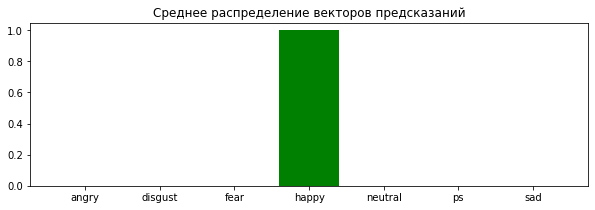

---------------------------------------------------------------
Файл: ./data/happy/happy.00397.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 19ms/step
Классификация сети: happy - ВЕРНО :-)


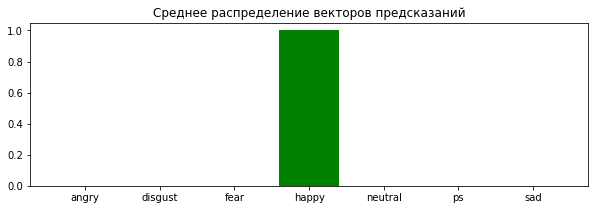

---------------------------------------------------------------
Файл: ./data/happy/happy.00398.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 20ms/step
Классификация сети: happy - ВЕРНО :-)


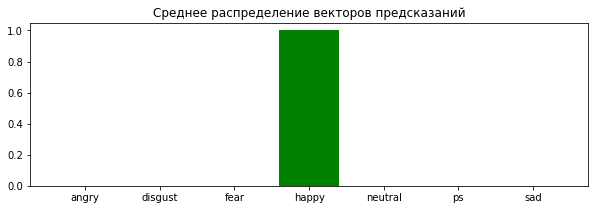

---------------------------------------------------------------
Файл: ./data/happy/happy.00399.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 22ms/step
Классификация сети: happy - ВЕРНО :-)


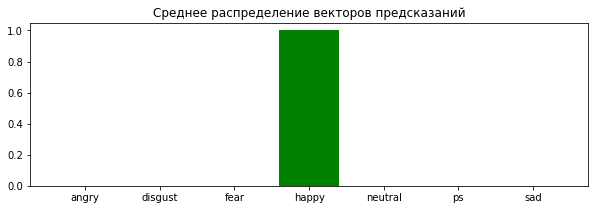

---------------------------------------------------------------
Файл: ./data/neutral/neutral.00390.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 18ms/step
Классификация сети: neutral - ВЕРНО :-)


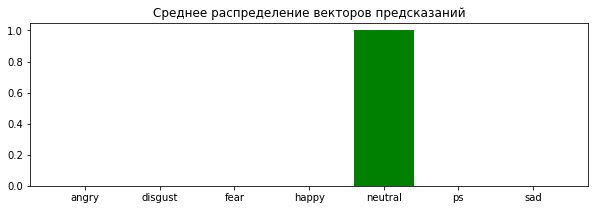

---------------------------------------------------------------
Файл: ./data/neutral/neutral.00391.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 23ms/step
Классификация сети: neutral - ВЕРНО :-)


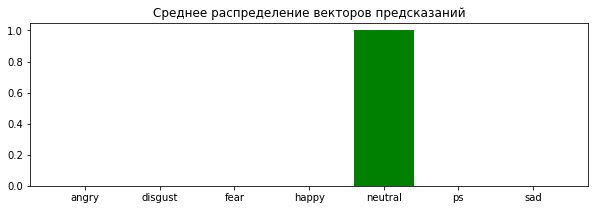

---------------------------------------------------------------
Файл: ./data/neutral/neutral.00392.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 24ms/step
Классификация сети: neutral - ВЕРНО :-)


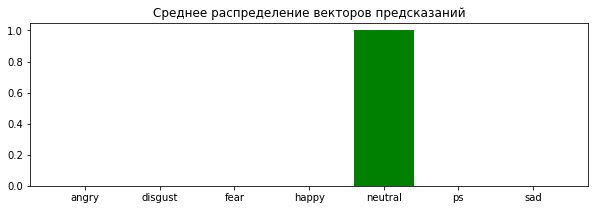

---------------------------------------------------------------
Файл: ./data/neutral/neutral.00393.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 22ms/step
Классификация сети: neutral - ВЕРНО :-)


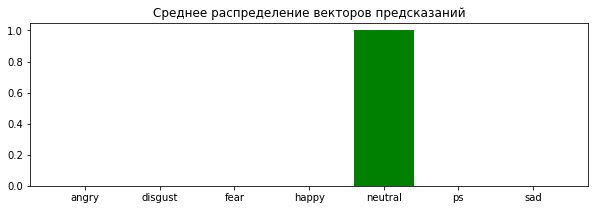

---------------------------------------------------------------
Файл: ./data/neutral/neutral.00394.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 24ms/step
Классификация сети: neutral - ВЕРНО :-)


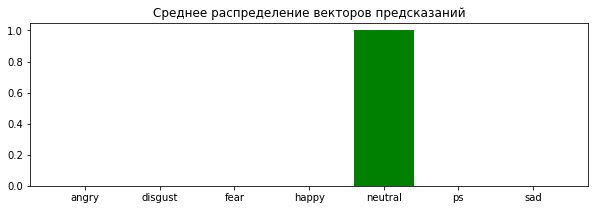

---------------------------------------------------------------
Файл: ./data/neutral/neutral.00395.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 23ms/step
Классификация сети: neutral - ВЕРНО :-)


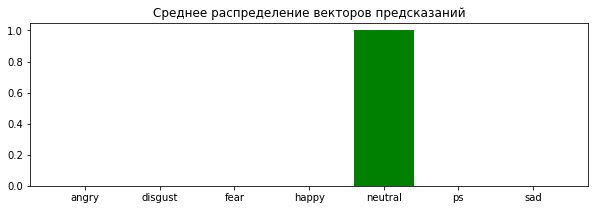

---------------------------------------------------------------
Файл: ./data/neutral/neutral.00396.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 28ms/step
Классификация сети: neutral - ВЕРНО :-)


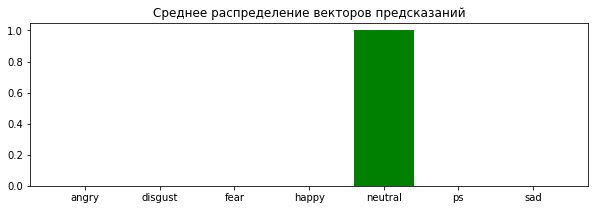

---------------------------------------------------------------
Файл: ./data/neutral/neutral.00397.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 24ms/step
Классификация сети: neutral - ВЕРНО :-)


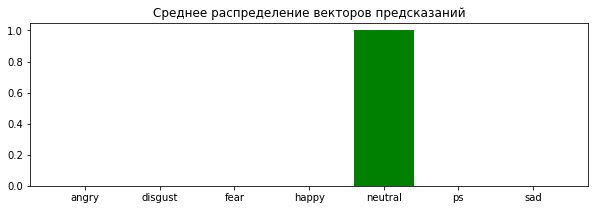

---------------------------------------------------------------
Файл: ./data/neutral/neutral.00398.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 24ms/step
Классификация сети: neutral - ВЕРНО :-)


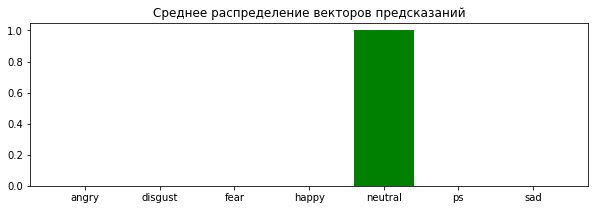

---------------------------------------------------------------
Файл: ./data/neutral/neutral.00399.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 22ms/step
Классификация сети: neutral - ВЕРНО :-)


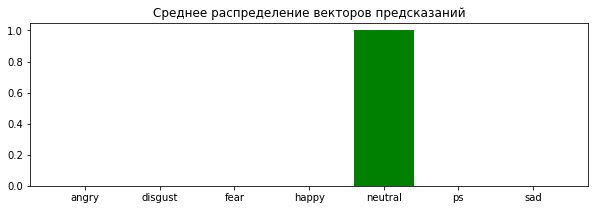

---------------------------------------------------------------
Файл: ./data/ps/ps.00390.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 23ms/step
Классификация сети: ps - ВЕРНО :-)


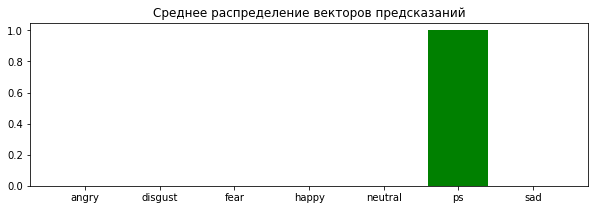

---------------------------------------------------------------
Файл: ./data/ps/ps.00391.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 26ms/step
Классификация сети: ps - ВЕРНО :-)


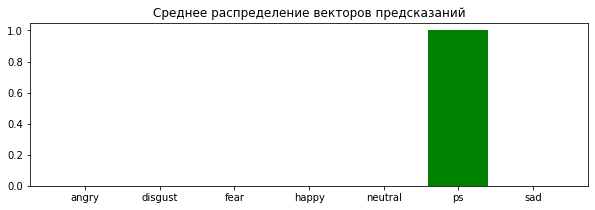

---------------------------------------------------------------
Файл: ./data/ps/ps.00392.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 16ms/step
Классификация сети: ps - ВЕРНО :-)


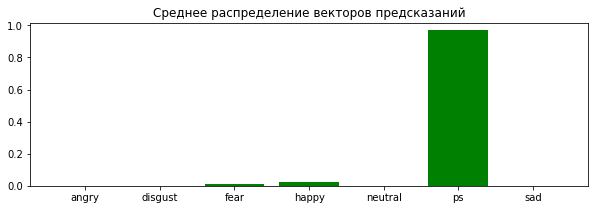

---------------------------------------------------------------
Файл: ./data/ps/ps.00393.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 18ms/step
Классификация сети: ps - ВЕРНО :-)


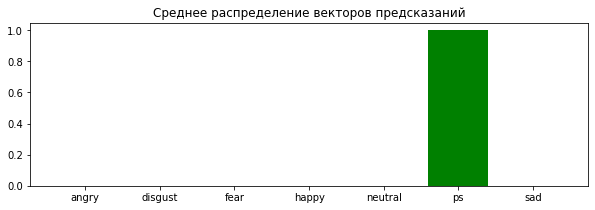

---------------------------------------------------------------
Файл: ./data/ps/ps.00394.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 18ms/step
Классификация сети: ps - ВЕРНО :-)


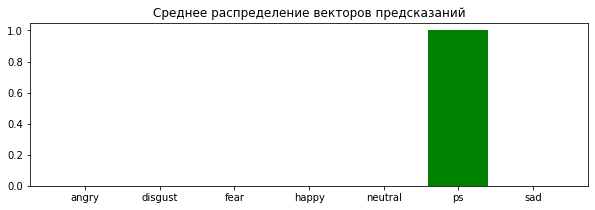

---------------------------------------------------------------
Файл: ./data/ps/ps.00395.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 15ms/step
Классификация сети: ps - ВЕРНО :-)


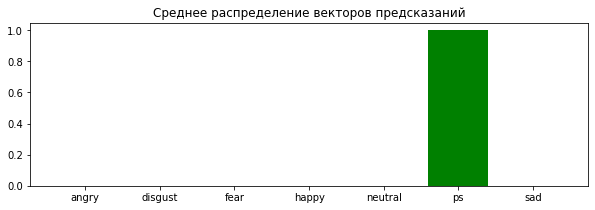

---------------------------------------------------------------
Файл: ./data/ps/ps.00396.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 20ms/step
Классификация сети: ps - ВЕРНО :-)


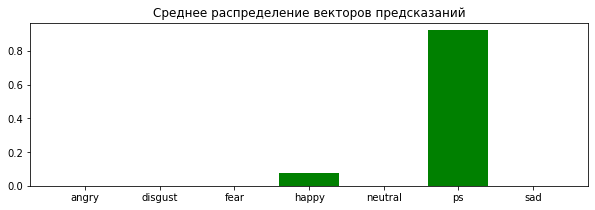

---------------------------------------------------------------
Файл: ./data/ps/ps.00397.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 19ms/step
Классификация сети: ps - ВЕРНО :-)


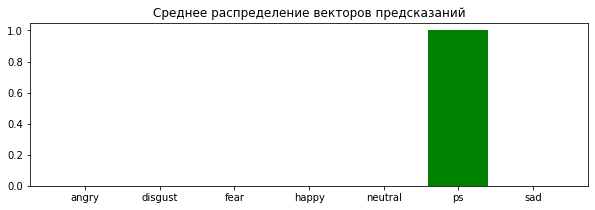

---------------------------------------------------------------
Файл: ./data/ps/ps.00398.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 22ms/step
Классификация сети: ps - ВЕРНО :-)


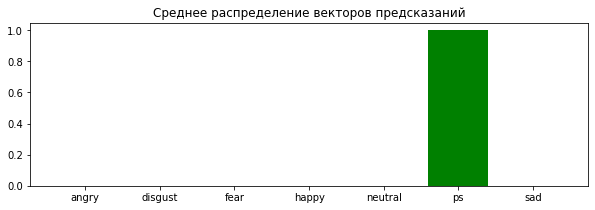

---------------------------------------------------------------
Файл: ./data/ps/ps.00399.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 19ms/step
Классификация сети: ps - ВЕРНО :-)


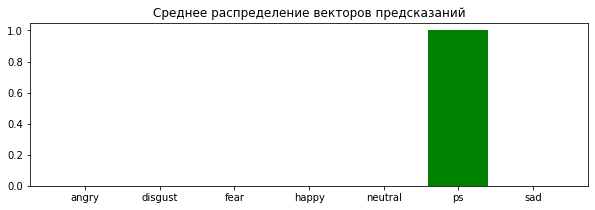

---------------------------------------------------------------
Файл: ./data/sad/sad.00390.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 15ms/step
Классификация сети: sad - ВЕРНО :-)


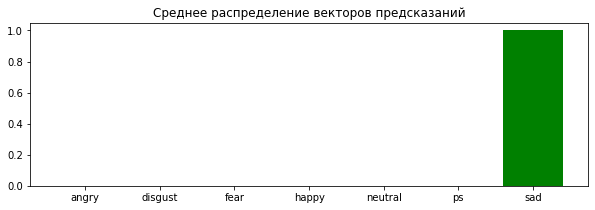

---------------------------------------------------------------
Файл: ./data/sad/sad.00391.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 18ms/step
Классификация сети: sad - ВЕРНО :-)


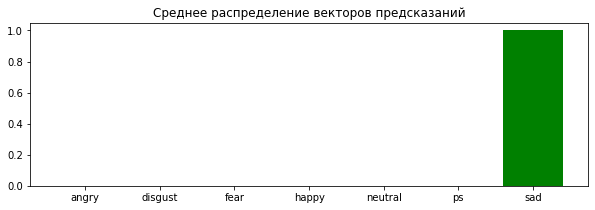

---------------------------------------------------------------
Файл: ./data/sad/sad.00392.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 21ms/step
Классификация сети: sad - ВЕРНО :-)


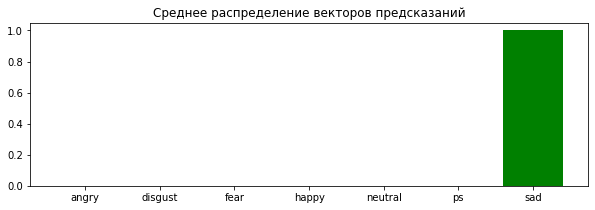

---------------------------------------------------------------
Файл: ./data/sad/sad.00393.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 19ms/step
Классификация сети: sad - ВЕРНО :-)


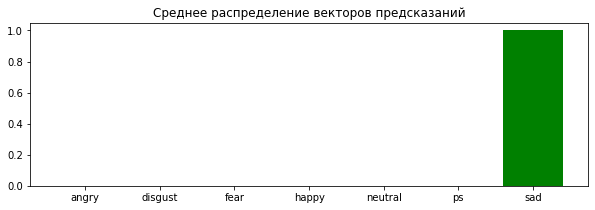

---------------------------------------------------------------
Файл: ./data/sad/sad.00394.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 18ms/step
Классификация сети: sad - ВЕРНО :-)


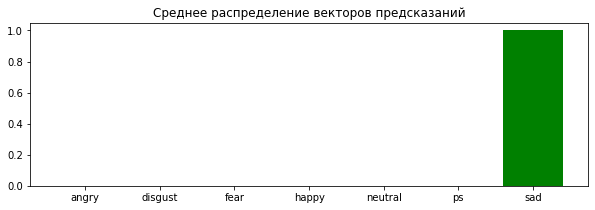

---------------------------------------------------------------
Файл: ./data/sad/sad.00395.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 18ms/step
Классификация сети: sad - ВЕРНО :-)


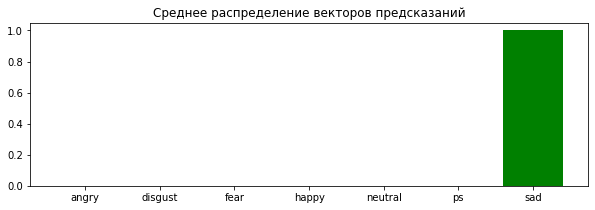

---------------------------------------------------------------
Файл: ./data/sad/sad.00396.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 15ms/step
Классификация сети: sad - ВЕРНО :-)


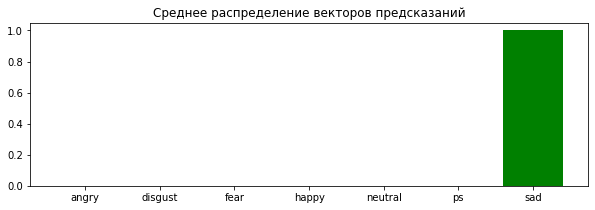

---------------------------------------------------------------
Файл: ./data/sad/sad.00397.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 16ms/step
Классификация сети: sad - ВЕРНО :-)


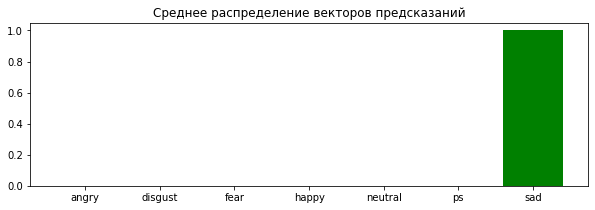

---------------------------------------------------------------
Файл: ./data/sad/sad.00398.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 17ms/step
Классификация сети: sad - ВЕРНО :-)


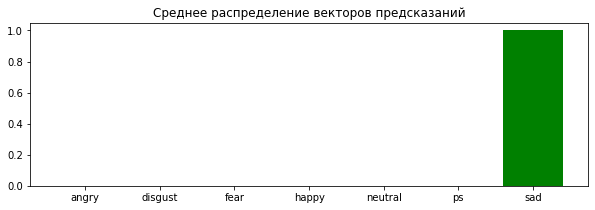

---------------------------------------------------------------
Файл: ./data/sad/sad.00399.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 18ms/step
Классификация сети: sad - ВЕРНО :-)


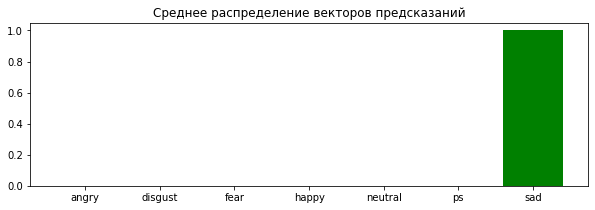

---------------------------------------------------------------
=== Обработано образцов: 70, из них распознано верно: 69, доля верных: 98.57% ===


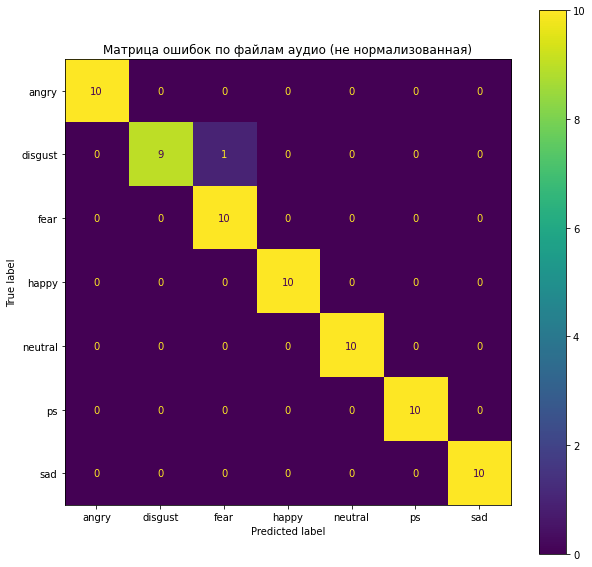

In [ ]:
# Визуализация классификации файлов из тестового набора
classify_test_files(model, x_scaler, 390, 10)

In [ ]:
#Теперь загрузим (добавим) датасет SAVEE в ту же файловую структру, но начиная с индекса файла TEST_FILE_START_IDX.
# Тогда можно будеть повторно воспользоваться кодом для проверки точности модели, но уже с индексами файлов из нового датасета.

In [ ]:
TEST_FILE_START_IDX = 900

In [ ]:
# Загрузка датасета
gdown.download('https://storage.yandexcloud.net/aiueducation/Content/base/l12/archive.zip', None, quiet=True)

'archive.zip'

In [ ]:
# Очистка папки сырых данных от прошлых запусков
!rm -rf {RAW_DIR}

# Распаковка архива на локальный диск colab
!unzip -qo archive.zip -d {RAW_DIR}

# Проверка выгруженных файлов
!ls {RAW_DIR}/ALL

DC_a01.wav  DC_n21.wav	 JE_f11.wav   JK_a01.wav  JK_n21.wav   KL_f11.wav
DC_a02.wav  DC_n22.wav	 JE_f12.wav   JK_a02.wav  JK_n22.wav   KL_f12.wav
DC_a03.wav  DC_n23.wav	 JE_f13.wav   JK_a03.wav  JK_n23.wav   KL_f13.wav
DC_a04.wav  DC_n24.wav	 JE_f14.wav   JK_a04.wav  JK_n24.wav   KL_f14.wav
DC_a05.wav  DC_n25.wav	 JE_f15.wav   JK_a05.wav  JK_n25.wav   KL_f15.wav
DC_a06.wav  DC_n26.wav	 JE_h01.wav   JK_a06.wav  JK_n26.wav   KL_h01.wav
DC_a07.wav  DC_n27.wav	 JE_h02.wav   JK_a07.wav  JK_n27.wav   KL_h02.wav
DC_a08.wav  DC_n28.wav	 JE_h03.wav   JK_a08.wav  JK_n28.wav   KL_h03.wav
DC_a09.wav  DC_n29.wav	 JE_h04.wav   JK_a09.wav  JK_n29.wav   KL_h04.wav
DC_a10.wav  DC_n30.wav	 JE_h05.wav   JK_a10.wav  JK_n30.wav   KL_h05.wav
DC_a11.wav  DC_sa01.wav  JE_h06.wav   JK_a11.wav  JK_sa01.wav  KL_h06.wav
DC_a12.wav  DC_sa02.wav  JE_h07.wav   JK_a12.wav  JK_sa02.wav  KL_h07.wav
DC_a13.wav  DC_sa03.wav  JE_h08.wav   JK_a13.wav  JK_sa03.wav  KL_h08.wav
DC_a14.wav  DC_sa04.wav  JE_h09.wav   JK_a14.wav

In [ ]:
author = []
word = []
emotion = []

for file_name in glob.glob(f'{RAW_DIR}/ALL/*.wav'):
    m = re.search(r'ALL/([A-Z]{2})_([a-z]+)([0-9]+)\.wav', file_name)
    file_author, file_emotion, file_word = m.groups()
    author.append(file_author)
    word.append(file_word)
    emotion.append(file_emotion)

author = sorted(list(set(author)))
word = sorted(list(set(word)))[:15]
emotion = sorted(list(set(emotion)))

# Карта соответствия меток  датасета меткам обычным
emo_map = {'a': 'angry', 'd': 'disgust', 'f': 'fear', 'h': 'happy', 'n': 'neutral', 'sa': 'sad', 'su': 'ps'}

print(f'Авторы: {len(author)} - {author}')
print(f'Слова:  {len(word)} - {word}')
print(f'Эмоции: {len(emotion)} - {emotion}')

Авторы: 4 - ['DC', 'JE', 'JK', 'KL']
Слова:  15 - ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15']
Эмоции: 7 - ['a', 'd', 'f', 'h', 'n', 'sa', 'su']


In [ ]:
#Добавим новые файлы в ту же папку данных, но начиная с индекса TEST_FILE_START_IDX (900).
#Данные TESS лежат в файлах с индексами от 0 до 399, данные SAVEE добавляются с индекса 900.

In [ ]:
for file_emo in emotion:
    file_index = TEST_FILE_START_IDX
    for file_word in word:
        for file_author in author:
            src = f'{RAW_DIR}/ALL/{file_author}_{file_emo}{file_word}.wav'
            dst = '{}/{}/{}.{:05d}.wav'.format(FILE_DIR, emo_map[file_emo], emo_map[file_emo], file_index)
            print(f'Копирование: {src} -> {dst}')
            shutil.copy(src, dst)
            file_index += 1

Копирование: ./dataverse/ALL/DC_a01.wav -> ./data/angry/angry.00900.wav
Копирование: ./dataverse/ALL/JE_a01.wav -> ./data/angry/angry.00901.wav
Копирование: ./dataverse/ALL/JK_a01.wav -> ./data/angry/angry.00902.wav
Копирование: ./dataverse/ALL/KL_a01.wav -> ./data/angry/angry.00903.wav
Копирование: ./dataverse/ALL/DC_a02.wav -> ./data/angry/angry.00904.wav
Копирование: ./dataverse/ALL/JE_a02.wav -> ./data/angry/angry.00905.wav
Копирование: ./dataverse/ALL/JK_a02.wav -> ./data/angry/angry.00906.wav
Копирование: ./dataverse/ALL/KL_a02.wav -> ./data/angry/angry.00907.wav
Копирование: ./dataverse/ALL/DC_a03.wav -> ./data/angry/angry.00908.wav
Копирование: ./dataverse/ALL/JE_a03.wav -> ./data/angry/angry.00909.wav
Копирование: ./dataverse/ALL/JK_a03.wav -> ./data/angry/angry.00910.wav
Копирование: ./dataverse/ALL/KL_a03.wav -> ./data/angry/angry.00911.wav
Копирование: ./dataverse/ALL/DC_a04.wav -> ./data/angry/angry.00912.wav
Копирование: ./dataverse/ALL/JE_a04.wav -> ./data/angry/angry.00

Файл: ./data/angry/angry.00900.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 19ms/step
Классификация сети: happy - НЕВЕРНО.


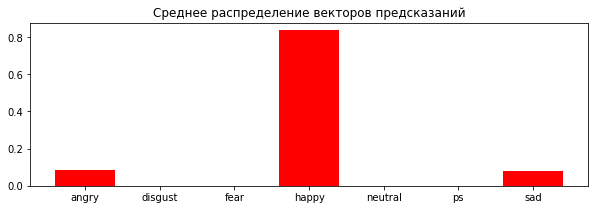

---------------------------------------------------------------
Файл: ./data/angry/angry.00901.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 15ms/step
Классификация сети: happy - НЕВЕРНО.


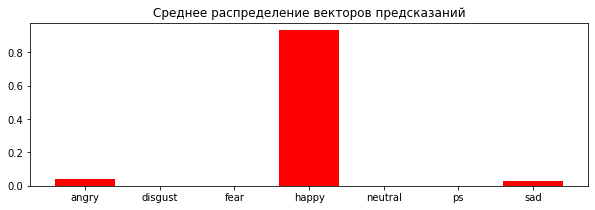

---------------------------------------------------------------
Файл: ./data/angry/angry.00902.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 16ms/step
Классификация сети: happy - НЕВЕРНО.


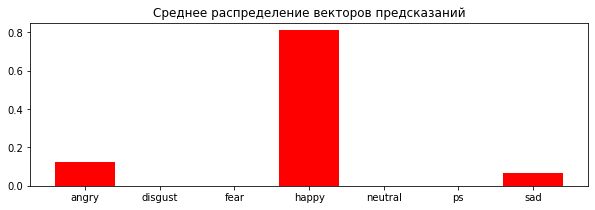

---------------------------------------------------------------
Файл: ./data/angry/angry.00903.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 16ms/step
Классификация сети: disgust - НЕВЕРНО.


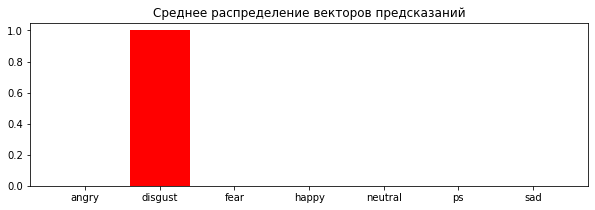

---------------------------------------------------------------
Файл: ./data/angry/angry.00904.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 15ms/step
Классификация сети: happy - НЕВЕРНО.


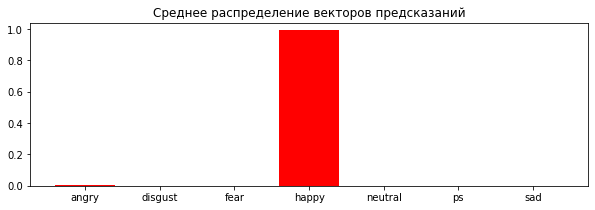

---------------------------------------------------------------
Файл: ./data/angry/angry.00905.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 15ms/step
Классификация сети: happy - НЕВЕРНО.


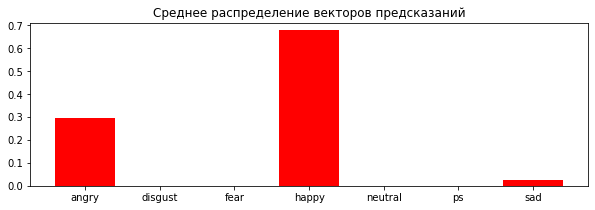

---------------------------------------------------------------
Файл: ./data/angry/angry.00906.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 16ms/step
Классификация сети: angry - ВЕРНО :-)


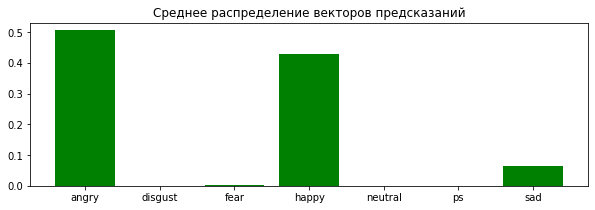

---------------------------------------------------------------
Файл: ./data/angry/angry.00907.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 15ms/step
Классификация сети: disgust - НЕВЕРНО.


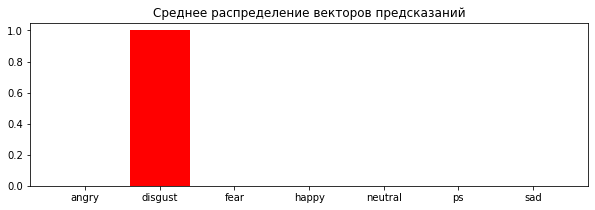

---------------------------------------------------------------
Файл: ./data/angry/angry.00908.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 18ms/step
Классификация сети: happy - НЕВЕРНО.


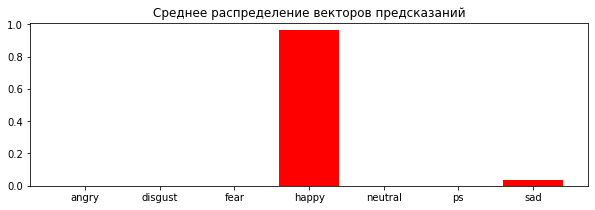

---------------------------------------------------------------
Файл: ./data/angry/angry.00909.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 18ms/step
Классификация сети: sad - НЕВЕРНО.


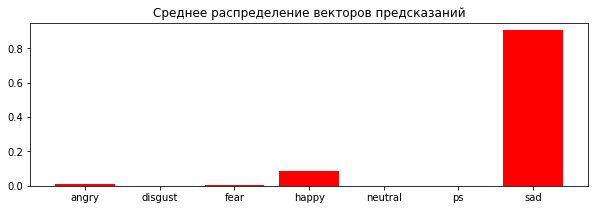

---------------------------------------------------------------
Файл: ./data/disgust/disgust.00900.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 15ms/step
Классификация сети: disgust - ВЕРНО :-)


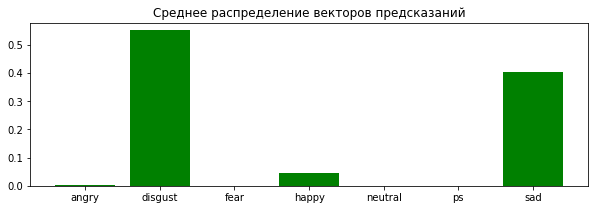

---------------------------------------------------------------
Файл: ./data/disgust/disgust.00901.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 15ms/step
Классификация сети: sad - НЕВЕРНО.


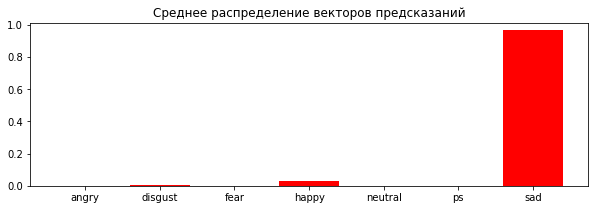

---------------------------------------------------------------
Файл: ./data/disgust/disgust.00902.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 15ms/step
Классификация сети: disgust - ВЕРНО :-)


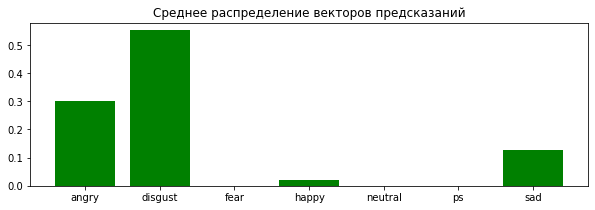

---------------------------------------------------------------
Файл: ./data/disgust/disgust.00903.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 19ms/step
Классификация сети: disgust - ВЕРНО :-)


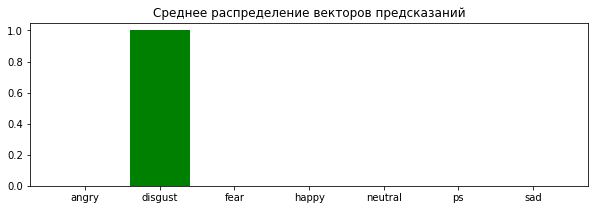

---------------------------------------------------------------
Файл: ./data/disgust/disgust.00904.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 15ms/step
Классификация сети: disgust - ВЕРНО :-)


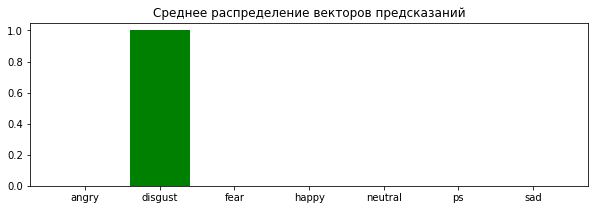

---------------------------------------------------------------
Файл: ./data/disgust/disgust.00905.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 17ms/step
Классификация сети: sad - НЕВЕРНО.


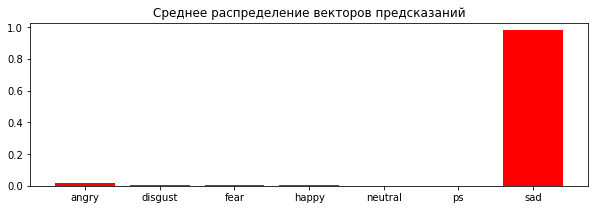

---------------------------------------------------------------
Файл: ./data/disgust/disgust.00906.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 16ms/step
Классификация сети: disgust - ВЕРНО :-)


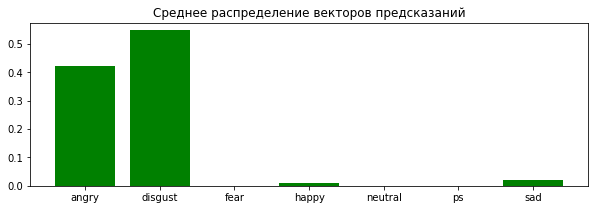

---------------------------------------------------------------
Файл: ./data/disgust/disgust.00907.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 14ms/step
Классификация сети: disgust - ВЕРНО :-)


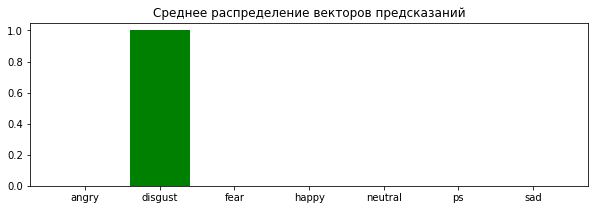

---------------------------------------------------------------
Файл: ./data/disgust/disgust.00908.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 16ms/step
Классификация сети: sad - НЕВЕРНО.


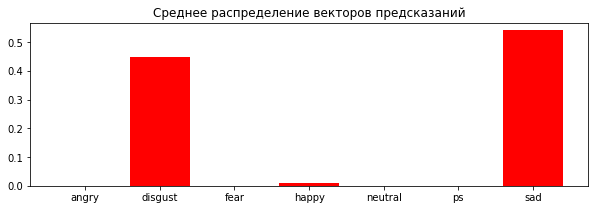

---------------------------------------------------------------
Файл: ./data/disgust/disgust.00909.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 16ms/step
Классификация сети: sad - НЕВЕРНО.


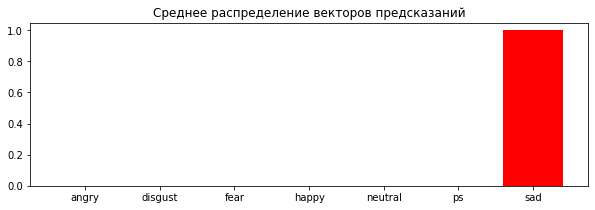

---------------------------------------------------------------
Файл: ./data/fear/fear.00900.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 20ms/step
Классификация сети: happy - НЕВЕРНО.


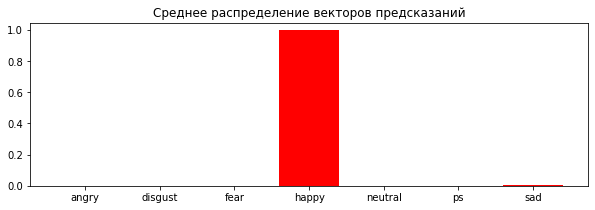

---------------------------------------------------------------
Файл: ./data/fear/fear.00901.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 17ms/step
Классификация сети: happy - НЕВЕРНО.


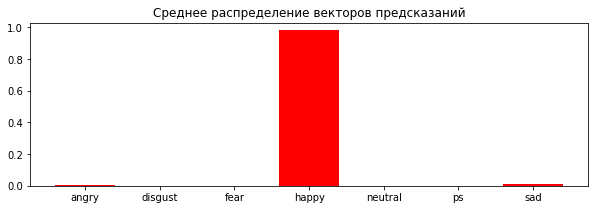

---------------------------------------------------------------
Файл: ./data/fear/fear.00902.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 17ms/step
Классификация сети: angry - НЕВЕРНО.


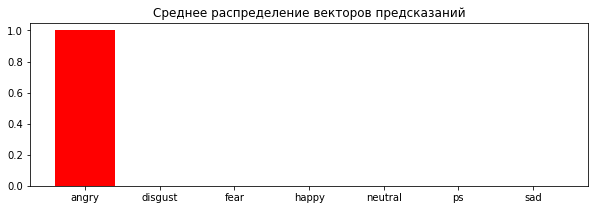

---------------------------------------------------------------
Файл: ./data/fear/fear.00903.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 15ms/step
Классификация сети: disgust - НЕВЕРНО.


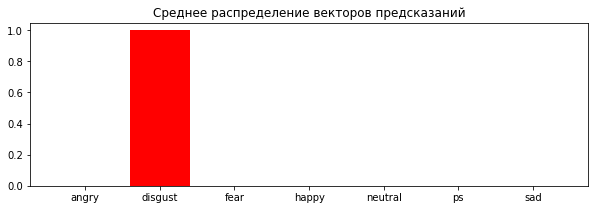

---------------------------------------------------------------
Файл: ./data/fear/fear.00904.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 15ms/step
Классификация сети: happy - НЕВЕРНО.


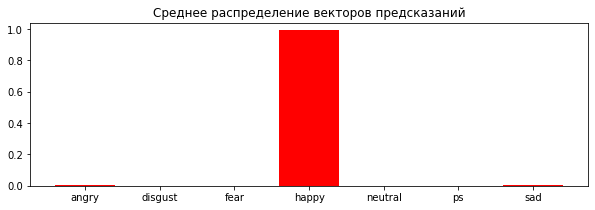

---------------------------------------------------------------
Файл: ./data/fear/fear.00905.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 15ms/step
Классификация сети: angry - НЕВЕРНО.


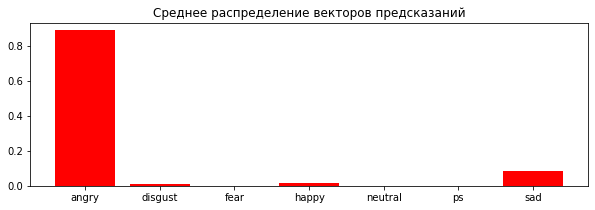

---------------------------------------------------------------
Файл: ./data/fear/fear.00906.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 19ms/step
Классификация сети: angry - НЕВЕРНО.


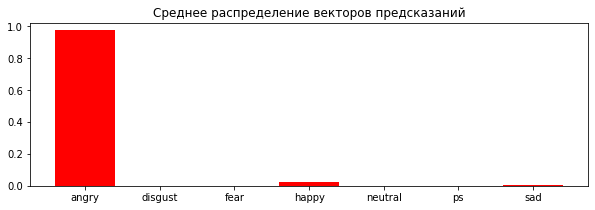

---------------------------------------------------------------
Файл: ./data/fear/fear.00907.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 21ms/step
Классификация сети: disgust - НЕВЕРНО.


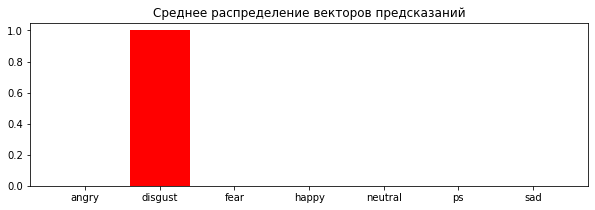

---------------------------------------------------------------
Файл: ./data/fear/fear.00908.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 19ms/step
Классификация сети: sad - НЕВЕРНО.


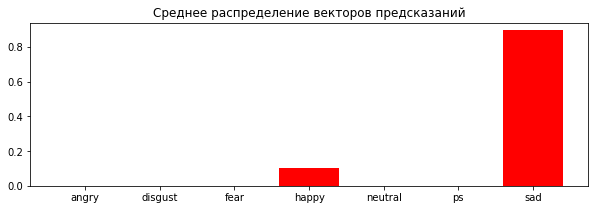

---------------------------------------------------------------
Файл: ./data/fear/fear.00909.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 19ms/step
Классификация сети: sad - НЕВЕРНО.


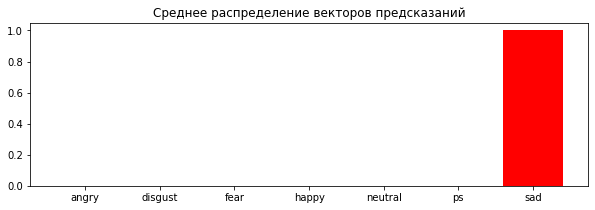

---------------------------------------------------------------
Файл: ./data/happy/happy.00900.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 15ms/step
Классификация сети: angry - НЕВЕРНО.


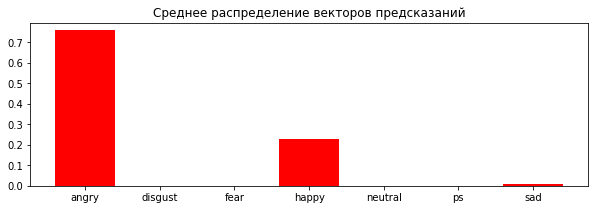

---------------------------------------------------------------
Файл: ./data/happy/happy.00901.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 14ms/step
Классификация сети: sad - НЕВЕРНО.


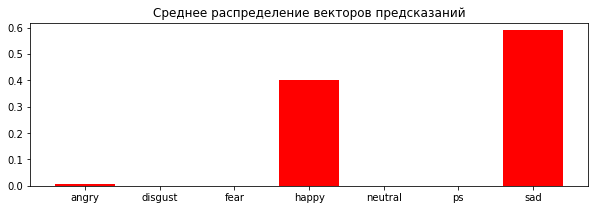

---------------------------------------------------------------
Файл: ./data/happy/happy.00902.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 18ms/step
Классификация сети: happy - ВЕРНО :-)


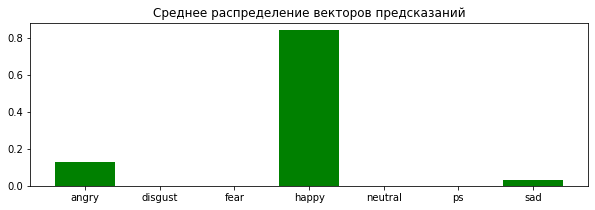

---------------------------------------------------------------
Файл: ./data/happy/happy.00903.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 16ms/step
Классификация сети: disgust - НЕВЕРНО.


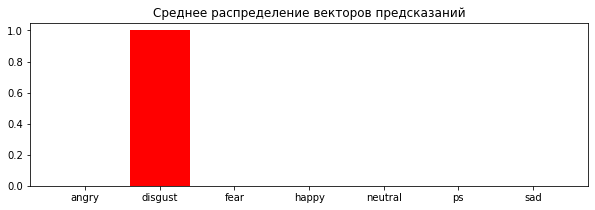

---------------------------------------------------------------
Файл: ./data/happy/happy.00904.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 17ms/step
Классификация сети: happy - ВЕРНО :-)


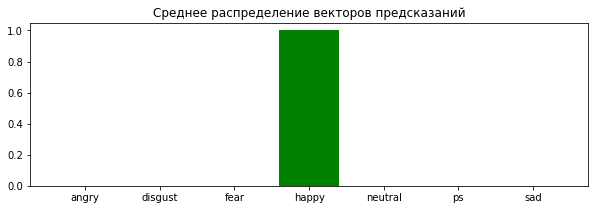

---------------------------------------------------------------
Файл: ./data/happy/happy.00905.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 15ms/step
Классификация сети: sad - НЕВЕРНО.


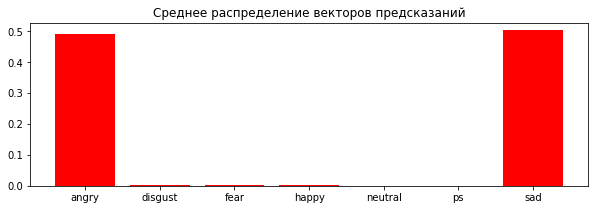

---------------------------------------------------------------
Файл: ./data/happy/happy.00906.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 17ms/step
Классификация сети: angry - НЕВЕРНО.


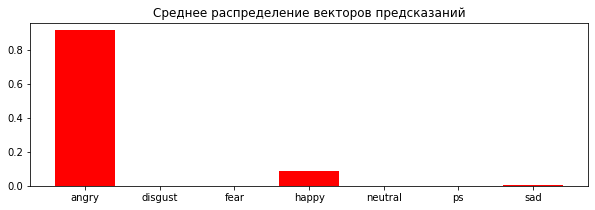

---------------------------------------------------------------
Файл: ./data/happy/happy.00907.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 21ms/step
Классификация сети: disgust - НЕВЕРНО.


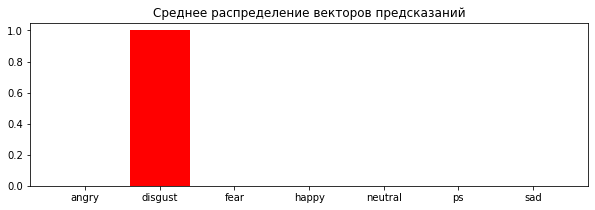

---------------------------------------------------------------
Файл: ./data/happy/happy.00908.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 15ms/step
Классификация сети: happy - ВЕРНО :-)


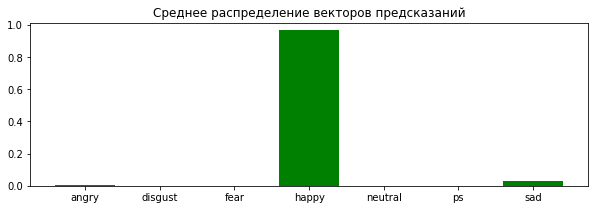

---------------------------------------------------------------
Файл: ./data/happy/happy.00909.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 15ms/step
Классификация сети: sad - НЕВЕРНО.


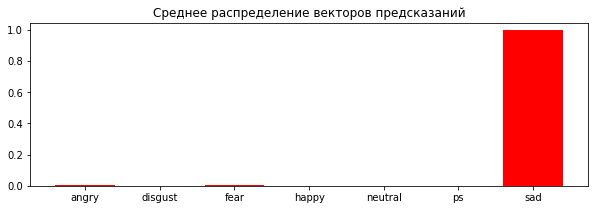

---------------------------------------------------------------
Файл: ./data/neutral/neutral.00900.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 15ms/step
Классификация сети: disgust - НЕВЕРНО.


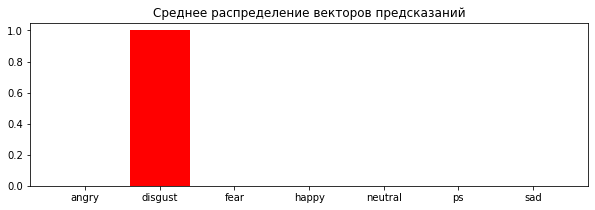

---------------------------------------------------------------
Файл: ./data/neutral/neutral.00901.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 18ms/step
Классификация сети: disgust - НЕВЕРНО.


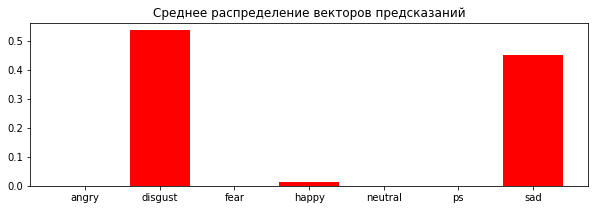

---------------------------------------------------------------
Файл: ./data/neutral/neutral.00902.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 16ms/step
Классификация сети: disgust - НЕВЕРНО.


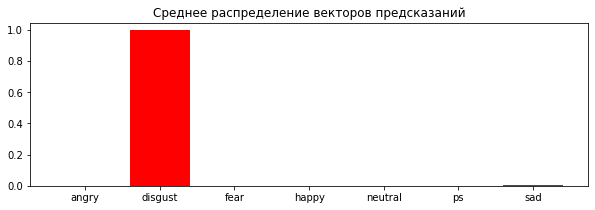

---------------------------------------------------------------
Файл: ./data/neutral/neutral.00903.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 15ms/step
Классификация сети: disgust - НЕВЕРНО.


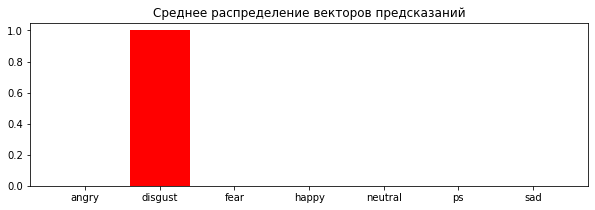

---------------------------------------------------------------
Файл: ./data/neutral/neutral.00904.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 18ms/step
Классификация сети: disgust - НЕВЕРНО.


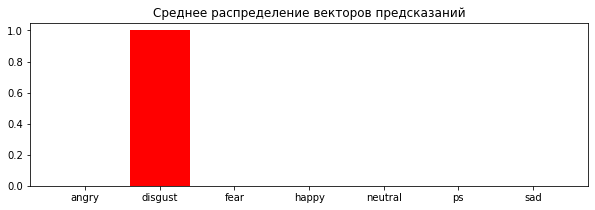

---------------------------------------------------------------
Файл: ./data/neutral/neutral.00905.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 14ms/step
Классификация сети: disgust - НЕВЕРНО.


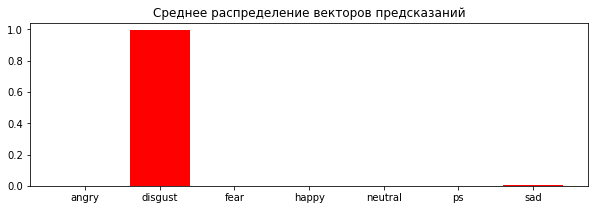

---------------------------------------------------------------
Файл: ./data/neutral/neutral.00906.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 17ms/step
Классификация сети: disgust - НЕВЕРНО.


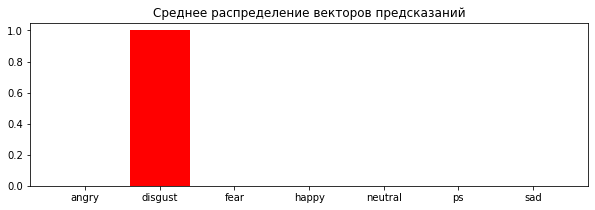

---------------------------------------------------------------
Файл: ./data/neutral/neutral.00907.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 16ms/step
Классификация сети: disgust - НЕВЕРНО.


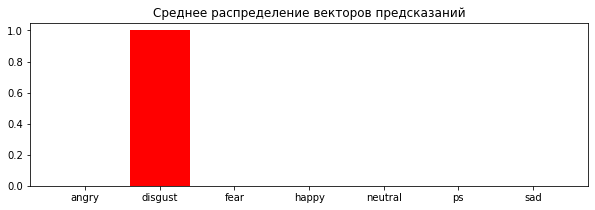

---------------------------------------------------------------
Файл: ./data/neutral/neutral.00908.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 20ms/step
Классификация сети: disgust - НЕВЕРНО.


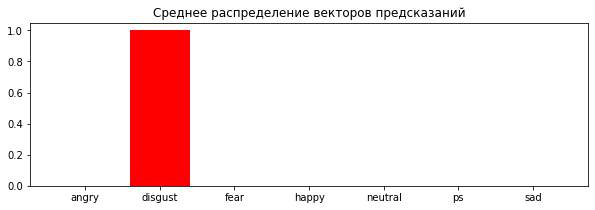

---------------------------------------------------------------
Файл: ./data/neutral/neutral.00909.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 15ms/step
Классификация сети: sad - НЕВЕРНО.


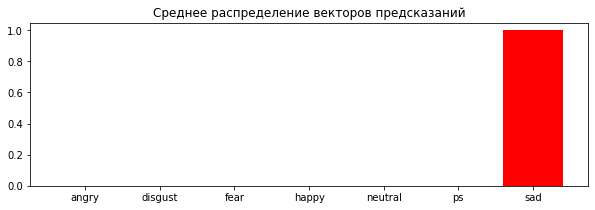

---------------------------------------------------------------
Файл: ./data/ps/ps.00900.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 17ms/step
Классификация сети: sad - НЕВЕРНО.


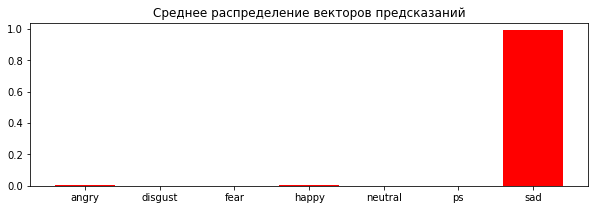

---------------------------------------------------------------
Файл: ./data/ps/ps.00901.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 17ms/step
Классификация сети: happy - НЕВЕРНО.


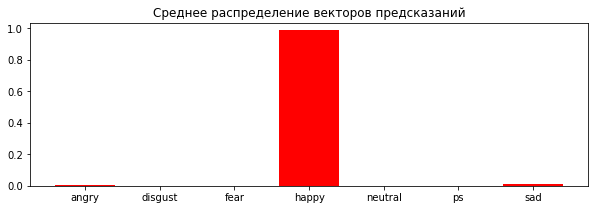

---------------------------------------------------------------
Файл: ./data/ps/ps.00902.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 15ms/step
Классификация сети: angry - НЕВЕРНО.


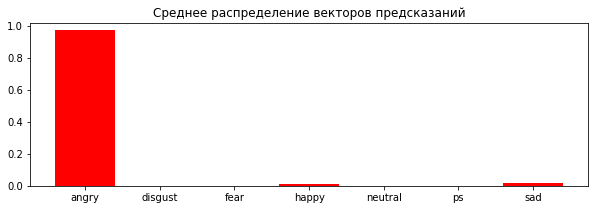

---------------------------------------------------------------
Файл: ./data/ps/ps.00903.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 14ms/step
Классификация сети: disgust - НЕВЕРНО.


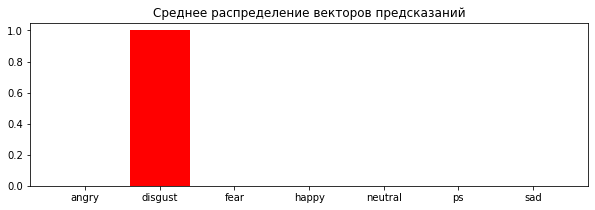

---------------------------------------------------------------
Файл: ./data/ps/ps.00904.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 15ms/step
Классификация сети: happy - НЕВЕРНО.


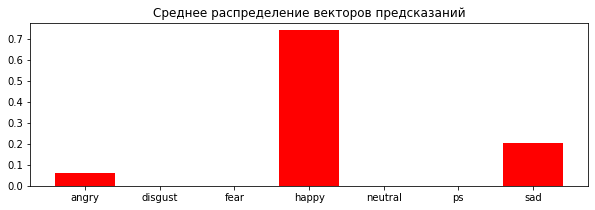

---------------------------------------------------------------
Файл: ./data/ps/ps.00905.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 15ms/step
Классификация сети: happy - НЕВЕРНО.


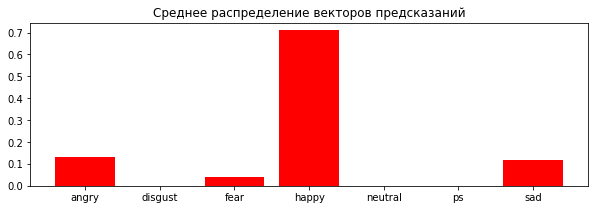

---------------------------------------------------------------
Файл: ./data/ps/ps.00906.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 18ms/step
Классификация сети: angry - НЕВЕРНО.


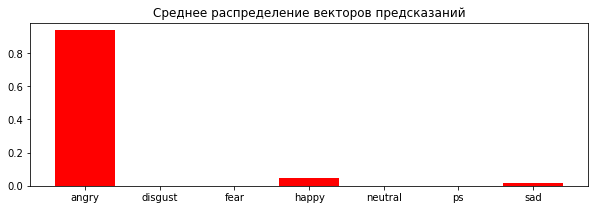

---------------------------------------------------------------
Файл: ./data/ps/ps.00907.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 18ms/step
Классификация сети: disgust - НЕВЕРНО.


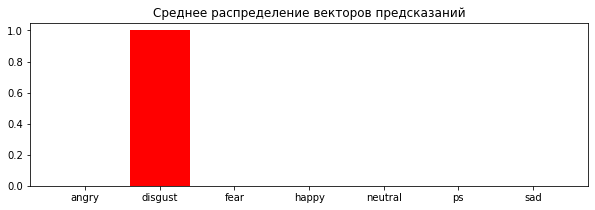

---------------------------------------------------------------
Файл: ./data/ps/ps.00908.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 29ms/step
Классификация сети: happy - НЕВЕРНО.


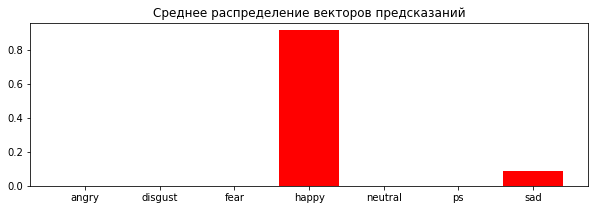

---------------------------------------------------------------
Файл: ./data/ps/ps.00909.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 17ms/step
Классификация сети: sad - НЕВЕРНО.


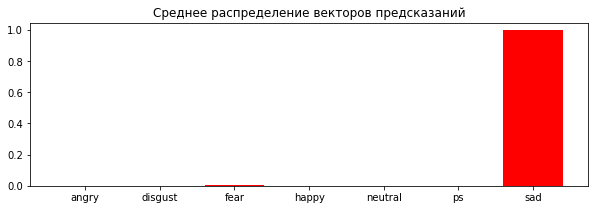

---------------------------------------------------------------
Файл: ./data/sad/sad.00900.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 17ms/step
Классификация сети: sad - ВЕРНО :-)


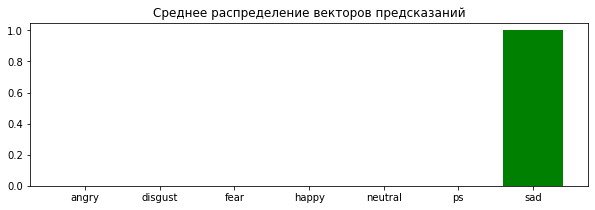

---------------------------------------------------------------
Файл: ./data/sad/sad.00901.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 17ms/step
Классификация сети: sad - ВЕРНО :-)


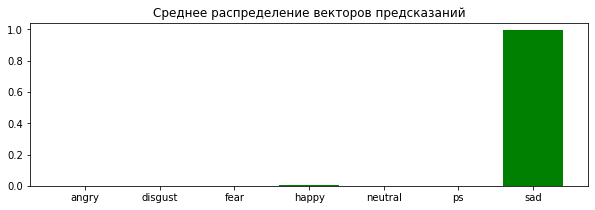

---------------------------------------------------------------
Файл: ./data/sad/sad.00902.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 18ms/step
Классификация сети: disgust - НЕВЕРНО.


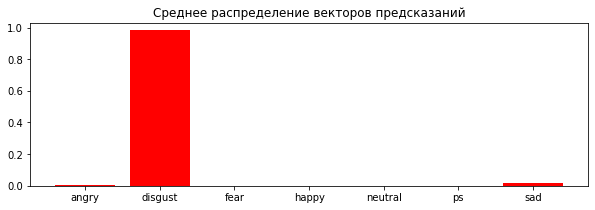

---------------------------------------------------------------
Файл: ./data/sad/sad.00903.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 15ms/step
Классификация сети: disgust - НЕВЕРНО.


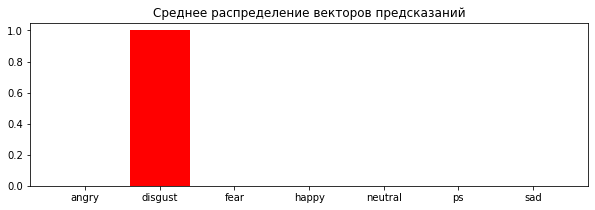

---------------------------------------------------------------
Файл: ./data/sad/sad.00904.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 15ms/step
Классификация сети: happy - НЕВЕРНО.


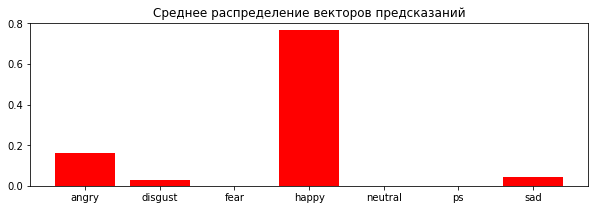

---------------------------------------------------------------
Файл: ./data/sad/sad.00905.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 15ms/step
Классификация сети: disgust - НЕВЕРНО.


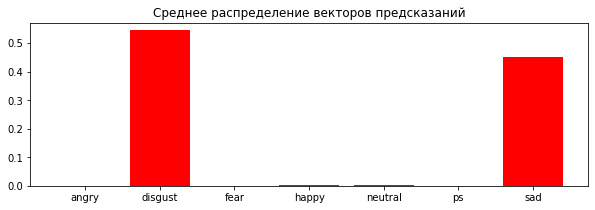

---------------------------------------------------------------
Файл: ./data/sad/sad.00906.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 15ms/step
Классификация сети: sad - ВЕРНО :-)


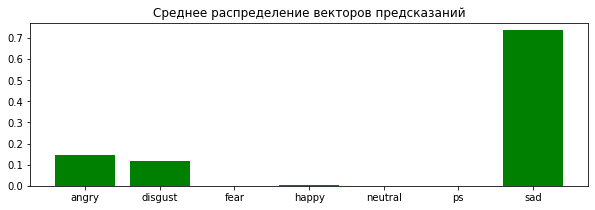

---------------------------------------------------------------
Файл: ./data/sad/sad.00907.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 17ms/step
Классификация сети: disgust - НЕВЕРНО.


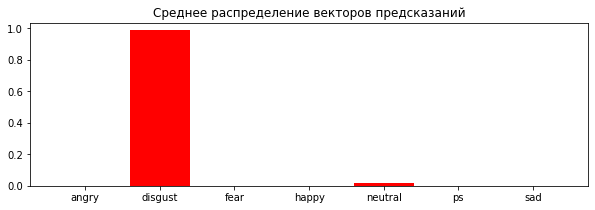

---------------------------------------------------------------
Файл: ./data/sad/sad.00908.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 15ms/step
Классификация сети: sad - ВЕРНО :-)


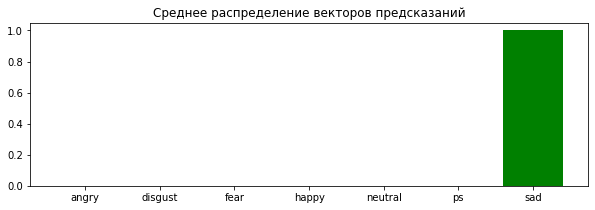

---------------------------------------------------------------
Файл: ./data/sad/sad.00909.wav
Векторы для предсказания: (1, 25)
1/1 [==============================] - 0s 16ms/step
Классификация сети: sad - ВЕРНО :-)


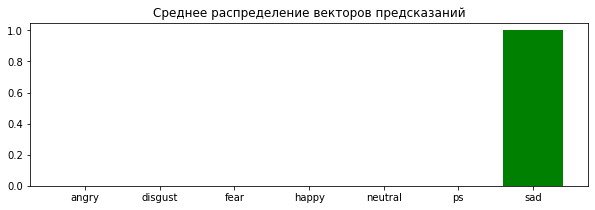

---------------------------------------------------------------
=== Обработано образцов: 70, из них распознано верно: 15, доля верных: 21.43% ===


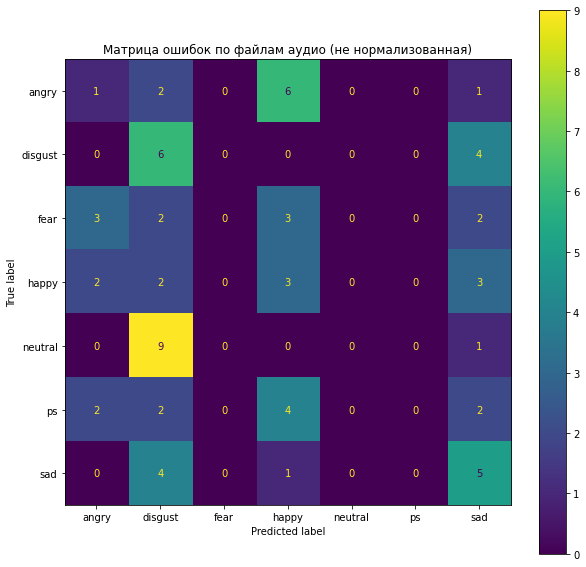

In [ ]:
# Визуализация классификации файлов из тестового набора
classify_test_files(model, x_scaler, TEST_FILE_START_IDX, 10)

In [ ]:
#Выводы:
#Спектрально-энергетические параметры речи нового датасета SAVEE имеют другие масштабы. Объект-нормировщик x_scaler и веса модели к ним не адаптированы;
#Файлы датасета SAVEE оцифрованы с другой частотой дискретизации.
#Это может влиять на расчеты спектра и потребовать доработки функций извлечения признаков (приведения к единой частоте/ресэмплинга);
#В датасете TESS только два спикера, этого мало для обобщения голосовых параметров эмоции. 
#Стиль речи все-таки у каждого свой, а в TESS лишь один мужчина и одна женщина;
#В датасете SAVEE спикеры - только мужчины, это не может не повлиять на точность распознавания;
#Удалось создать узкоселективный классификатор с хорошей точностью. Но он еще не годится работы с произвольными речевыми данными.